In [1]:
import matplotlib.pyplot as plt
import matplotlib as m
import numpy as np
import scipy.special as sc
import pandas as pd
import itertools

In [2]:
# calculating Bayes factors
def get_BF(N_1, n_1, N_2, n_2):

    return (sc.betaln( u_1 + n_1, u_2 + N_1 - n_1) + sc.betaln( u_1 + n_2, u_2 + N_2 - n_2) - sc.betaln( u_1 + n_1 + n_2, u_2 + N_1 - n_1 + N_2 - n_2)) / np.log(10) 

# calculating log fold change
def get_FC(N_1, n_1, N_2, n_2):
    rate_1 = (u_1 + n_1) / (u_2 + N_1 - n_1)
    rate_2 = (u_1 + n_2) / (u_2 + N_2 - n_2)

    return np.log2(rate_2 / rate_1)

# calculating q (following Laplace's rule of succession)
def get_q(n, N):
    return (n+1)/(N+2)

# setting the priors to flat prios
u_1 = 1
u_2 = 1


In [3]:
# from explore_clean_yeast.ipynb we extracted some data about the yeast replicates to get an idea about the size of N and n in real biological data


# all N

# WT_yeast.sum(axis=0, numeric_only=True).describe()

# >>>
# count    4.300000e+01
# mean     8.343976e+06
# std      2.300538e+06
# min      3.215091e+05
# 25%      7.190686e+06
# 50%      8.012039e+06
# 75%      9.549212e+06
# max      1.462021e+07
# dtype: float64

# all n

# WT_yeast.describe().iloc[:,:3]

#                    1              2              3
# count    7126.000000    7126.000000    7126.000000
# mean      836.951445    1107.284732     903.445411
# std      4439.068260    4814.327137    4021.018869
# min         0.000000       0.000000       0.000000
# 25%        49.000000      88.000000      74.250000
# 50%       224.000000     371.000000     297.000000
# 75%       561.000000     853.000000     669.500000
# max    188825.000000  196804.000000  172119.000000

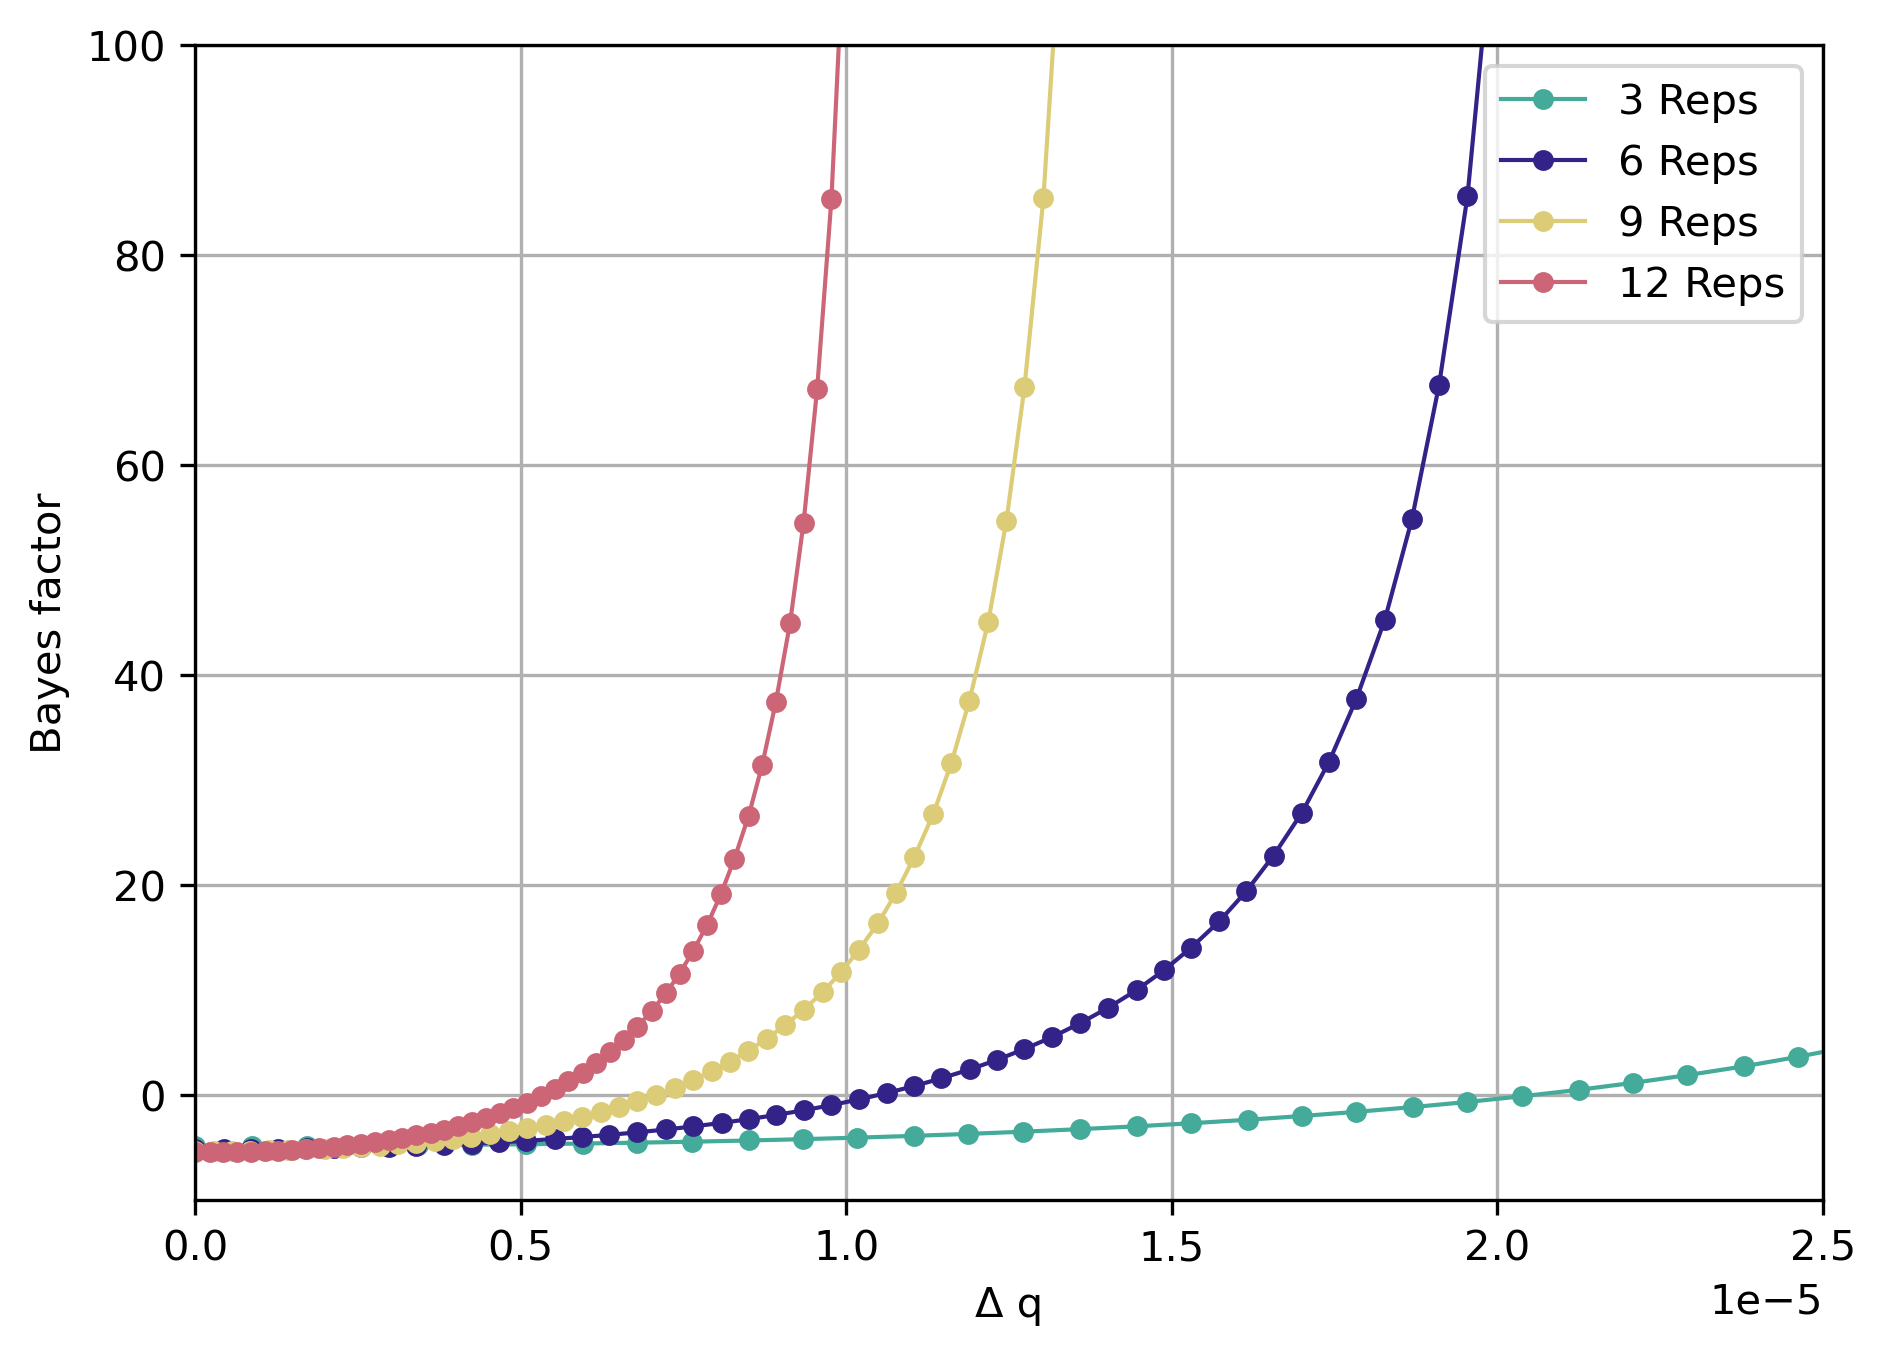

,n_1,n_2,dq_3,BF_3,dq_6,BF_6,dq_9,BF_9,dq_12,BF_12,dn
0,1000,1,4.162500e-05,291.255921,2.081250e-05,290.952636,1.387500e-05,290.775793,1.040625e-05,290.650478,999
1,1183,205,4.075000e-05,159.889135,2.037500e-05,159.585944,1.358333e-05,159.409133,1.018750e-05,159.283834,978
2,1367,409,3.991666e-05,112.982137,1.995833e-05,112.679035,1.330556e-05,112.502253,9.979166e-06,112.376969,958
3,1551,613,3.908333e-05,85.929730,1.954167e-05,85.626714,1.302778e-05,85.449962,9.770833e-06,85.324692,938
4,1734,817,3.820833e-05,67.901720,1.910417e-05,67.598793,1.273611e-05,67.422070,9.552083e-06,67.296815,917
5,1918,1021,3.737500e-05,55.142892,1.868750e-05,54.840048,1.245833e-05,54.663353,9.343750e-06,54.538112,897
6,2102,1225,3.654166e-05,45.565563,1.827083e-05,45.262801,1.218056e-05,45.086132,9.135416e-06,44.960904,877
7,2285,1429,3.566666e-05,38.023898,1.783333e-05,37.721219,1.188889e-05,37.544578,8.916666e-06,37.419364,856
8,2469,1633,3.483333e-05,32.077208,1.741667e-05,31.774606,1.161111e-05,31.597991,8.708333e-06,31.472791,836
9,2653,1837,3.400000e-05,27.222780,1.700000e-05,26.920254,1.133333e-05,26.743664,8.500000e-06,26.618476,816


In [4]:
# this plot is just to get into how we do the other plots in this notebook


n_1 = np.linspace(1000, 10000, num=50, endpoint=True, retstep=False, dtype=int, axis=0)
n_2 = np.linspace(1, 10000, num=50, endpoint=True, retstep=False, dtype=int, axis=0)


data = pd.DataFrame({'n_1': n_1, 'n_2': n_2})

plt.figure(dpi=300, figsize=(7,5))


plt.subplot()
plt.xlim(0.0, 0.000025)
plt.ylim(-10, 100)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3
N_2 = 8e+06 * 3

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

data['dq_3'] = x1
data['BF_3'] = y1

plt.plot(x1, y1, 
        lw=1, color='#44AA99', linestyle='-',
        marker='o', markersize=4, 
        label='3 Reps')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factor')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

data['dq_6'] = x1
data['BF_6'] = y1

plt.plot(x1, y1, 
        lw=1, color='#332288', linestyle='-',
        marker='o', markersize=4, 
        label='6 Reps')

# 9 average yeast replicate
N_1 = 8e+06 * 9
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

data['dq_9'] = x1
data['BF_9'] = y1

plt.plot(x1, y1, 
        lw=1, color='#DDCC77', linestyle='-',
        marker='o', markersize=4, 
        label='9 Reps')

# 12 average yeast replicate
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

data['dq_12'] = x1
data['BF_12'] = y1

plt.plot(x1, y1, 
        lw=1, color='#CC6677', linestyle='-',
        marker='o', markersize=4, 
        label='12 Reps')

plt.legend(loc='upper right')

plt.show()

data['dn'] = n_1-n_2

display(data)

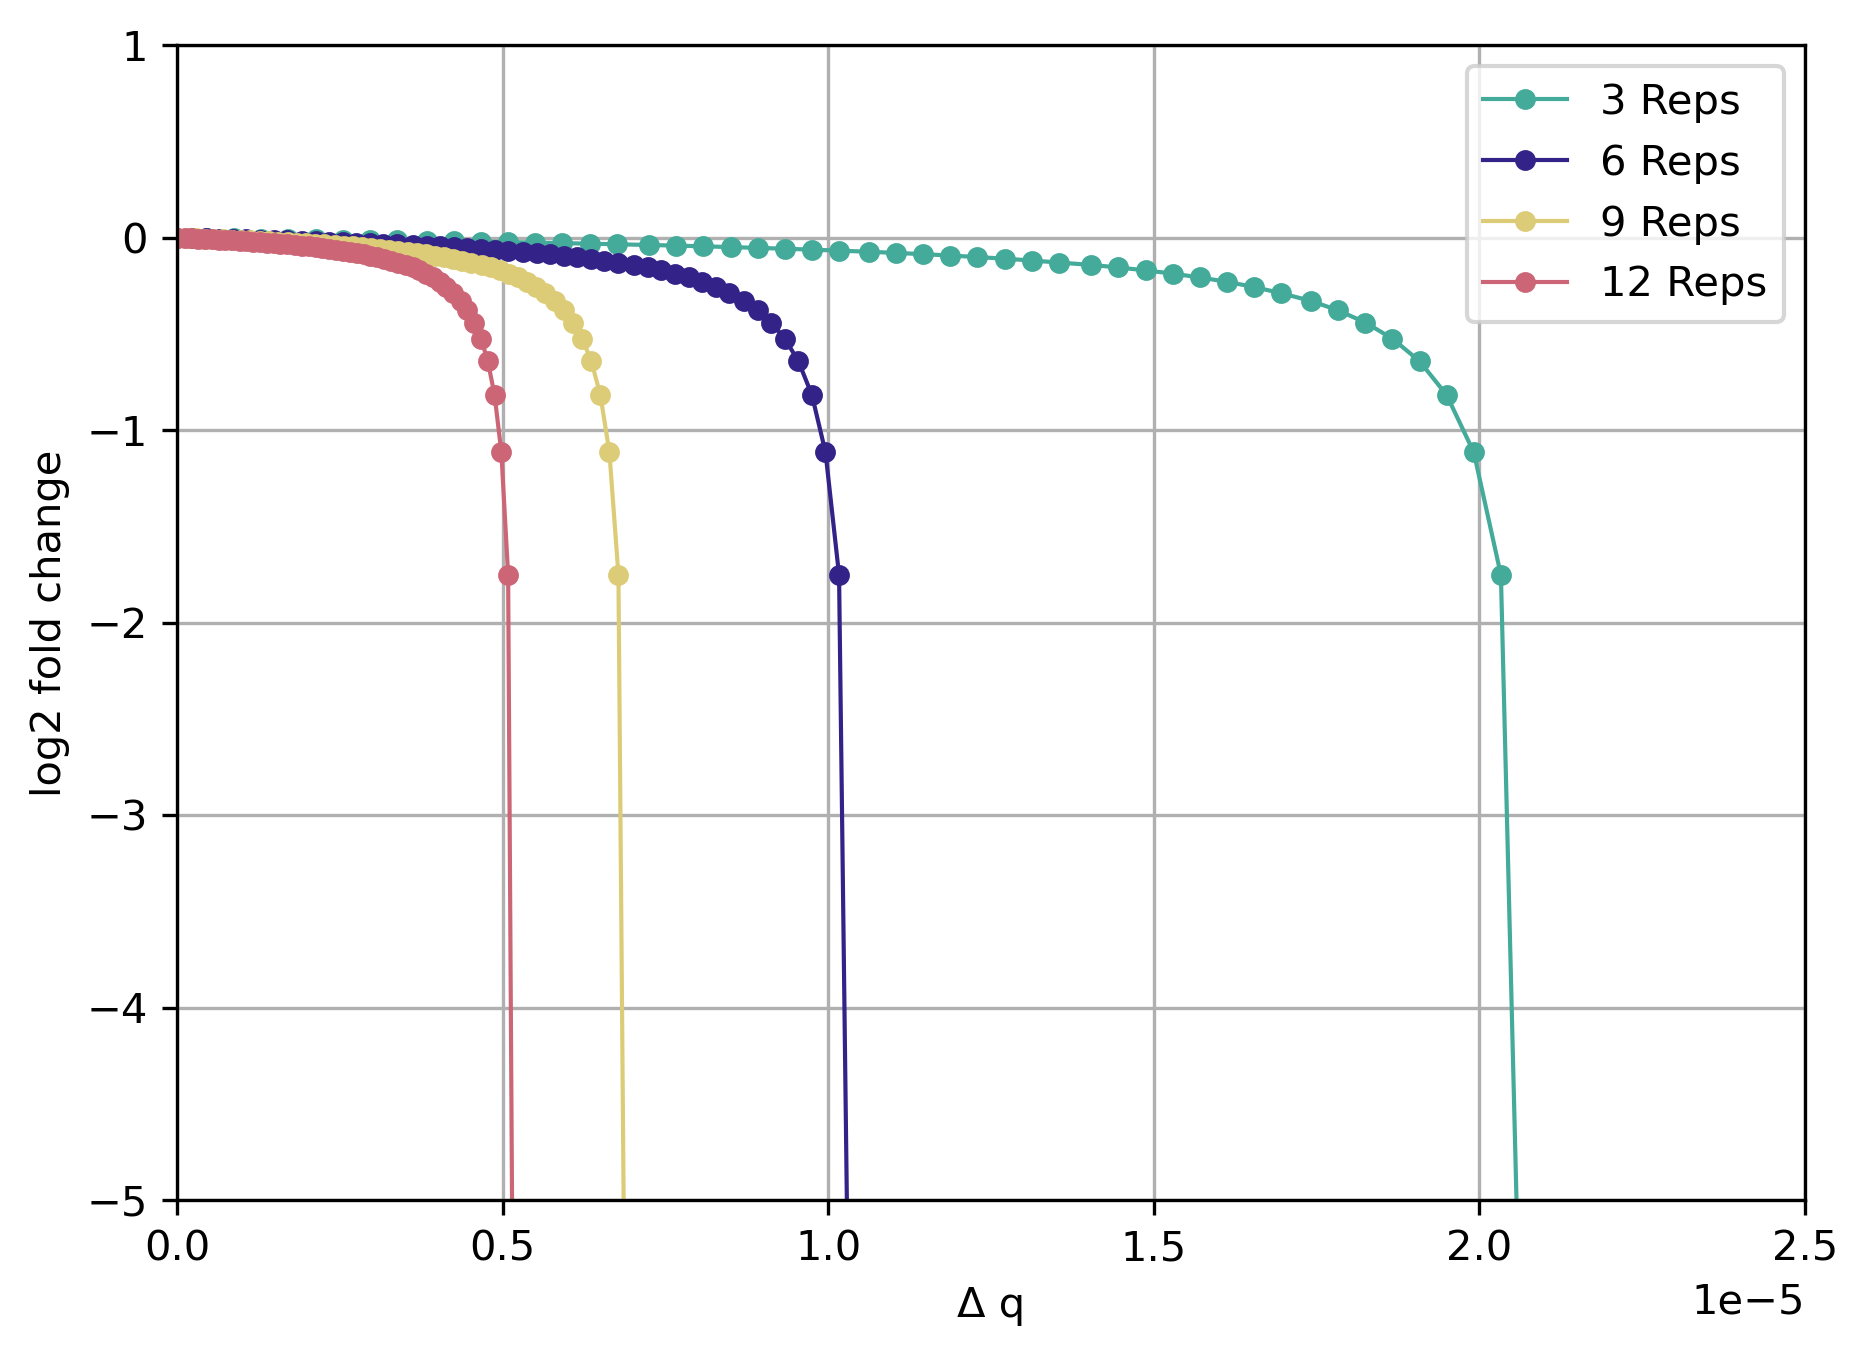

In [5]:
# this plot is just to get into how we do the other plots in this notebook


u_1 = 1
u_2 = 1


n_1 = np.linspace(500, 10000, num=50, endpoint=True, retstep=False, dtype=int, axis=0)
n_2 = np.linspace(1, 10000, num=50, endpoint=True, retstep=False, dtype=int, axis=0)

plt.figure(dpi=300, figsize=(7,5))

plt.subplot()
plt.xlim(0.0, 0.000025)
plt.ylim(-5, 1)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=1, color='#44AA99', linestyle='-', marker='o', markersize=4, 
        label='3 Reps')

plt.tick_params('x', labelbottom=True)
plt.ylabel('log2 fold change')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=1, color='#332288', linestyle='-', marker='o', markersize=4, 
        label='6 Reps')

# 9 average yeast replicate
N_1 = 8e+06 * 9
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=1, color='#DDCC77', linestyle='-', marker='o', markersize=4, 
        label='9 Reps')

# 12 average yeast replicate
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=1, color='#CC6677', linestyle='-', marker='o', markersize=4, 
        label='12 Reps')

plt.legend(loc='upper right')

plt.show()

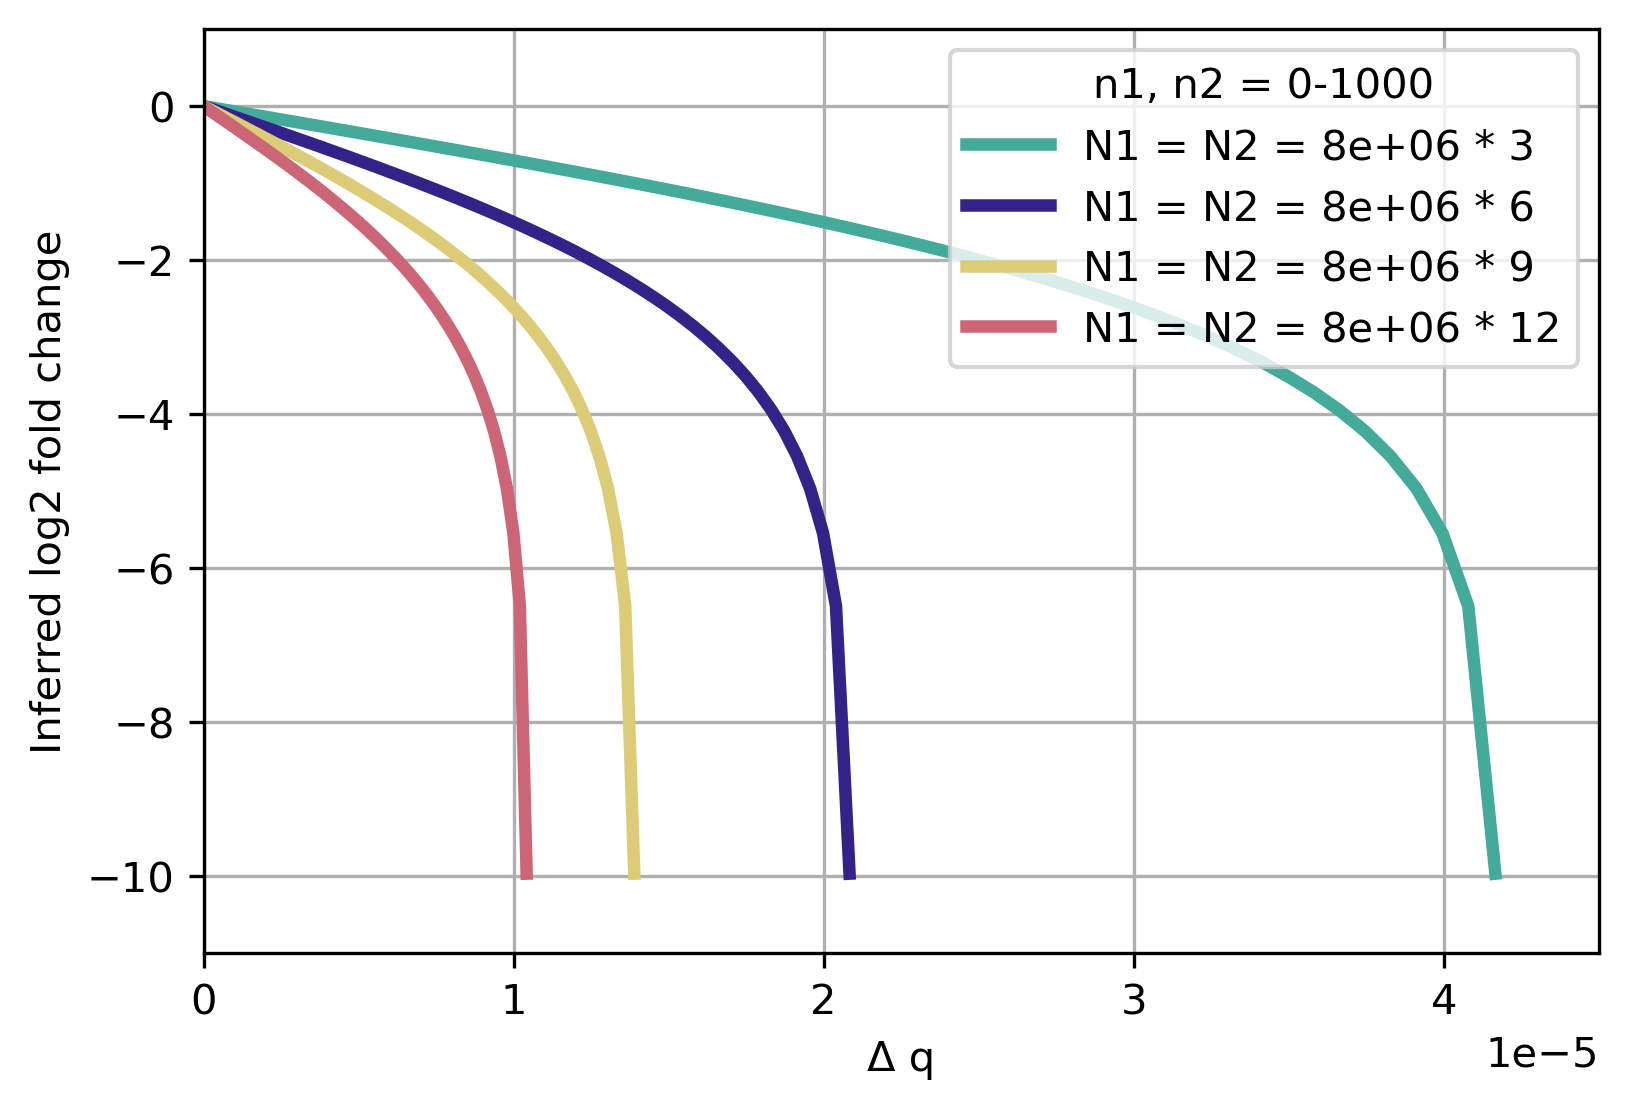

In [6]:
# delta q


u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 100, dtype=int))
n_2 = np.linspace(0, 1000, 100, dtype=int)

plt.figure(dpi=300, figsize=(6,4))

plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-11, 1)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N1 = N2 = 8e+06 * 3')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N1 = N2 = 8e+06 * 6')

# 9 average yeast replicate
N_1 = 8e+06 * 9
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N1 = N2 = 8e+06 * 9')

# 12 average yeast replicate
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)


plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N1 = N2 = 8e+06 * 12')


plt.legend(title='n1, n2 = 0-1000', loc='upper right')

plt.show()

# saved as 2D for paper

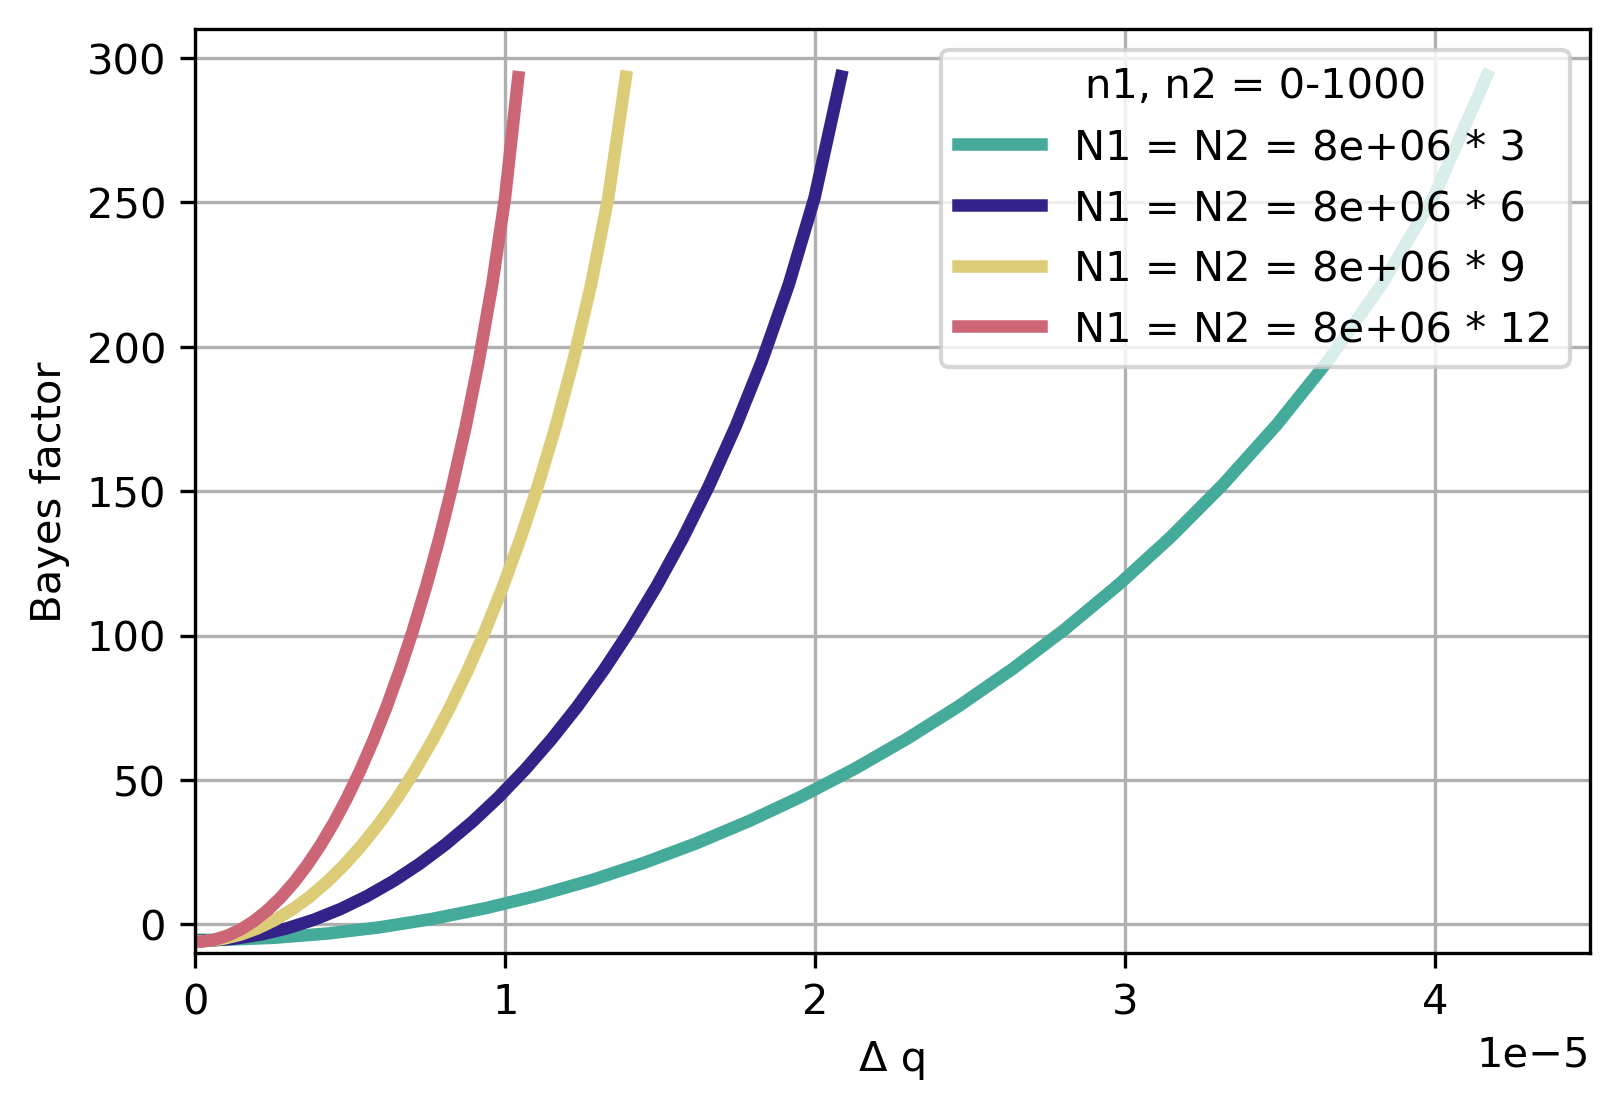

In [7]:
# delta q


u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 50, dtype=int))
n_2 = np.linspace(0, 1000, 50, dtype=int)

plt.figure(dpi=300, figsize=(6,4))


plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-10, 310)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N1 = N2 = 8e+06 * 3')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factor')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N1 = N2 = 8e+06 * 6')

# 9 average yeast replicate
N_1 = 8e+06 * 9
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N1 = N2 = 8e+06 * 9')

# 12 average yeast replicate
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N1 = N2 = 8e+06 * 12')

plt.legend(title='n1, n2 = 0-1000', loc='upper right')
plt.show()

# saved as 2C for paper

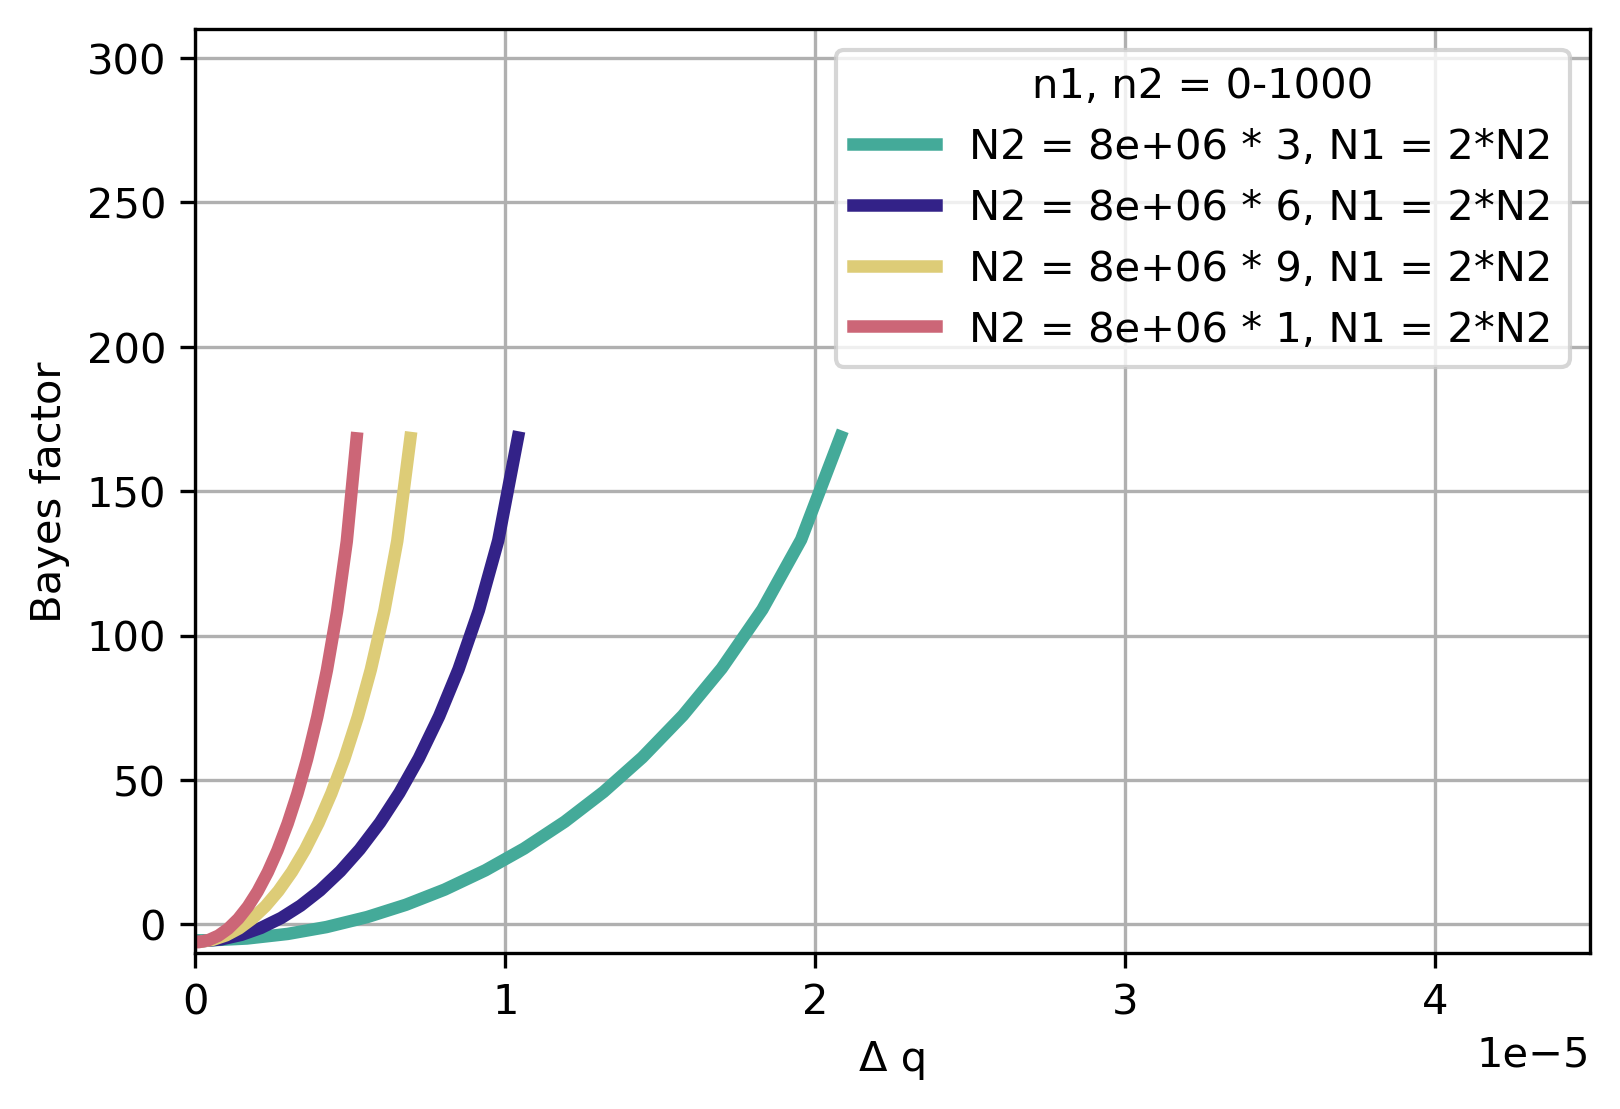

In [8]:
# delta q
# What if N_1 >> N_2 
# and n_1 and n_2 stay between 0-1000
# * 2

u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 50, dtype=int))
n_2 = np.linspace(0, 1000, 50, dtype=int)

plt.figure(dpi=300, figsize=(6,4))


plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-10, 310)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3 * 2
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N2 = 8e+06 * 3, N1 = 2*N2')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factor')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6 * 2
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N2 = 8e+06 * 6, N1 = 2*N2')

# 9 average yeast replicate
N_1 = 8e+06 * 9 * 2
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N2 = 8e+06 * 9, N1 = 2*N2')

# 12 average yeast replicate
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N2 = 8e+06 * 1, N1 = 2*N2')

plt.legend(title='n1, n2 = 0-1000', loc='upper right')
plt.show()


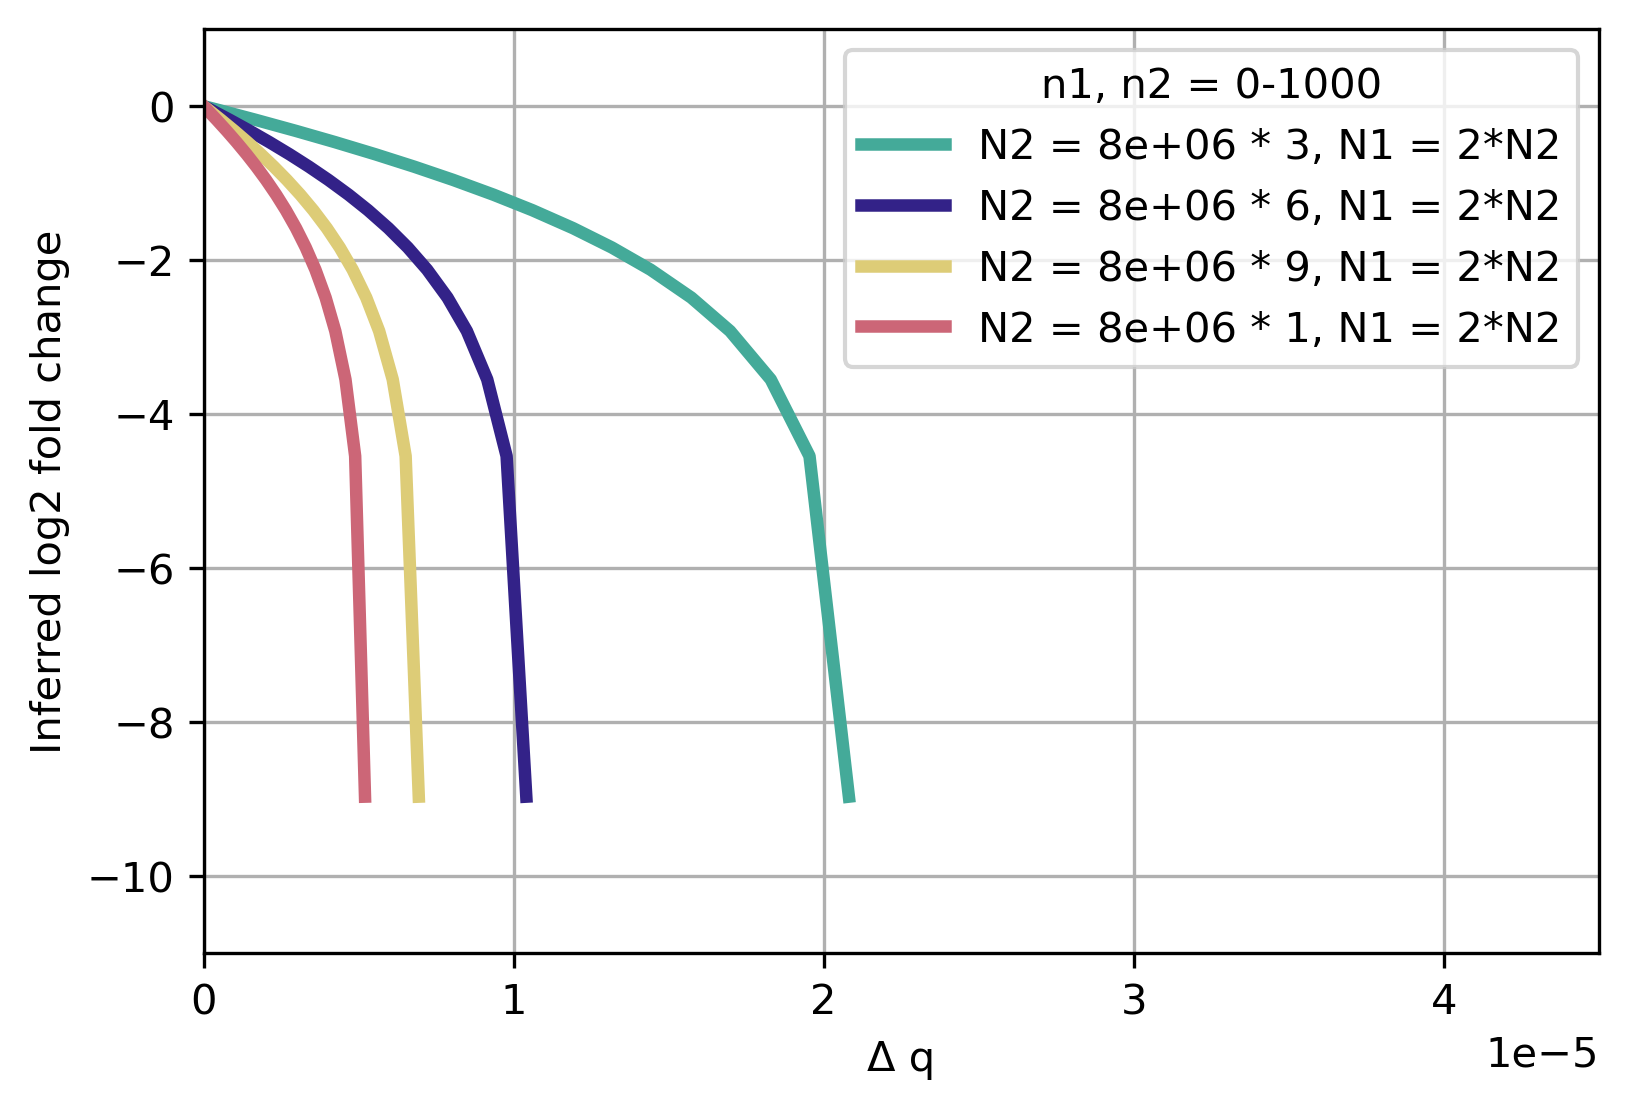

In [9]:
# delta q
# What if N_1 >> N_2 
# and n_1 and n_2 stay between 0-1000
# * 2

u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 50, dtype=int))
n_2 = np.linspace(0, 1000, 50, dtype=int)

plt.figure(dpi=300, figsize=(6,4))


plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-11, 1)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3 * 2
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N2 = 8e+06 * 3, N1 = 2*N2')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6 * 2
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N2 = 8e+06 * 6, N1 = 2*N2')

# 9 average yeast replicate
N_1 = 8e+06 * 9 * 2
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N2 = 8e+06 * 9, N1 = 2*N2')

# 12 average yeast replicate
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N2 = 8e+06 * 1, N1 = 2*N2')

plt.legend(title='n1, n2 = 0-1000', loc='upper right')
plt.show()

# exported as 2Dsupp1 for the manuscript

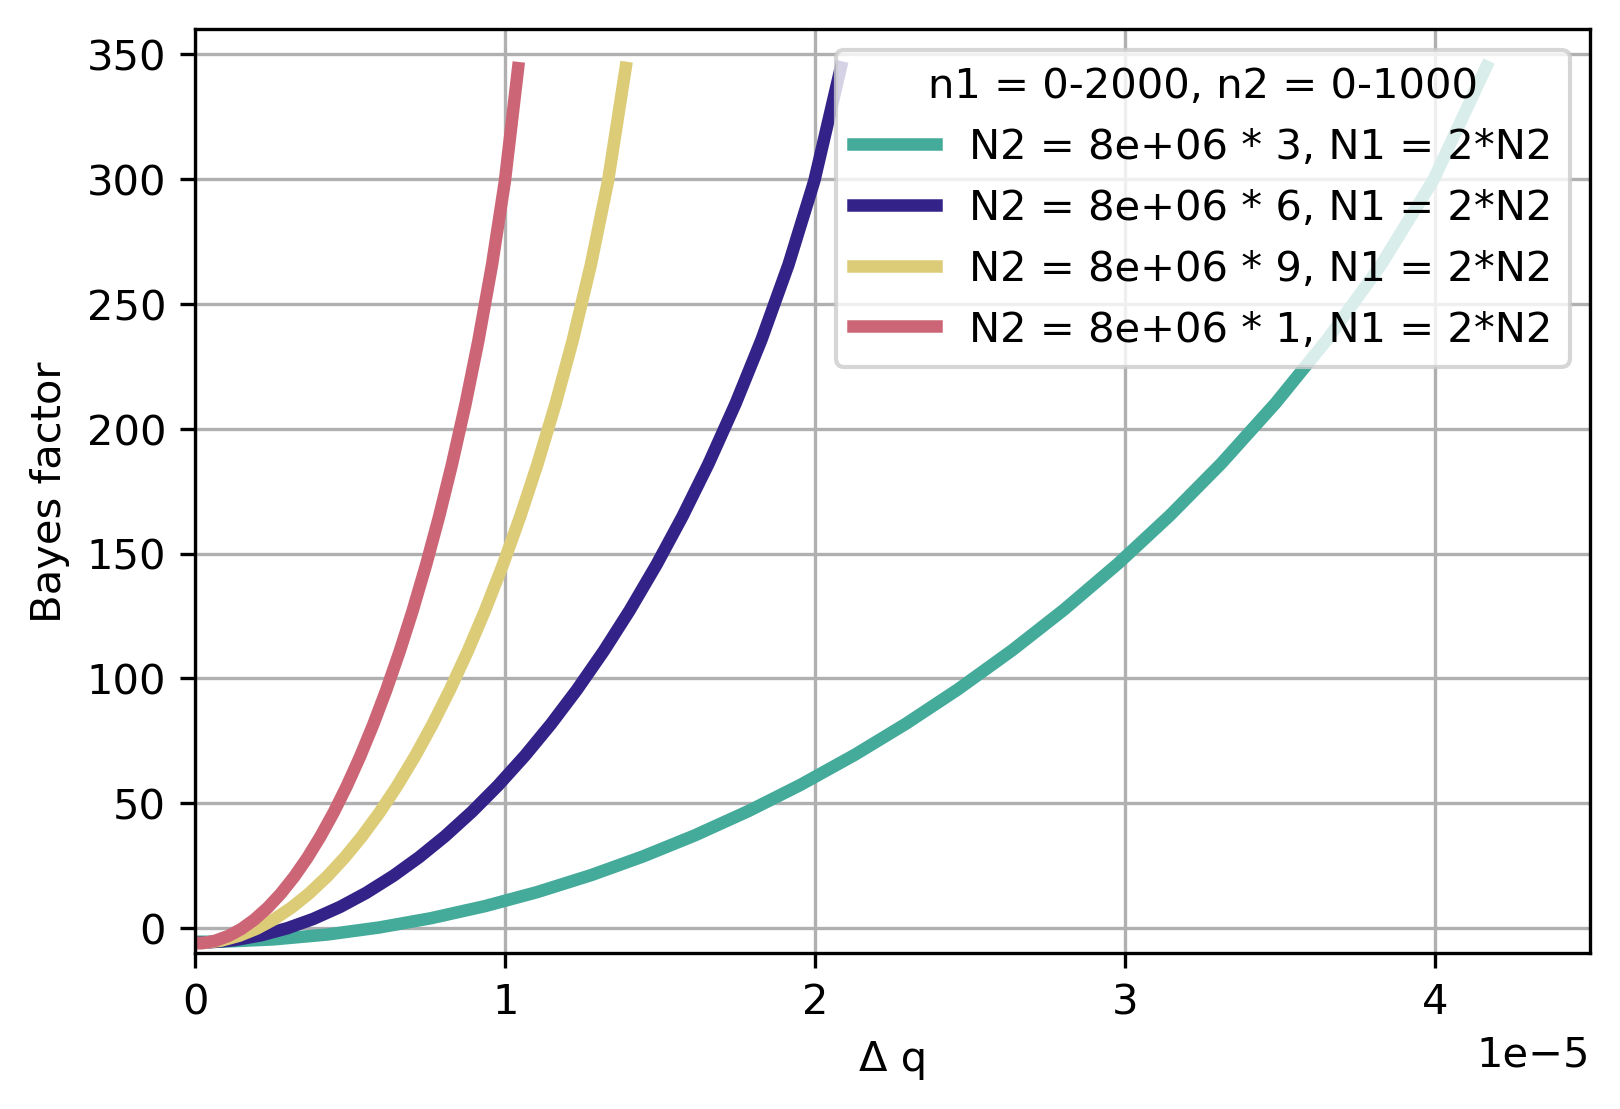

In [10]:
# delta q
# What if N_1 >> N_2 and n_1 >> n_2
# * 2

u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 50, dtype=int)) * 2
n_2 = np.linspace(0, 1000, 50, dtype=int)

plt.figure(dpi=300, figsize=(6,4))


plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-10, 360)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3 * 2
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N2 = 8e+06 * 3, N1 = 2*N2')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factor')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6 * 2
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N2 = 8e+06 * 6, N1 = 2*N2')

# 9 average yeast replicate
N_1 = 8e+06 * 9 * 2
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N2 = 8e+06 * 9, N1 = 2*N2')

# 12 average yeast replicate
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_BF(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N2 = 8e+06 * 1, N1 = 2*N2')

plt.legend(title='n1 = 0-2000, n2 = 0-1000', loc='upper right')
plt.show()

# exported as 2Csupp2 for the manuscript


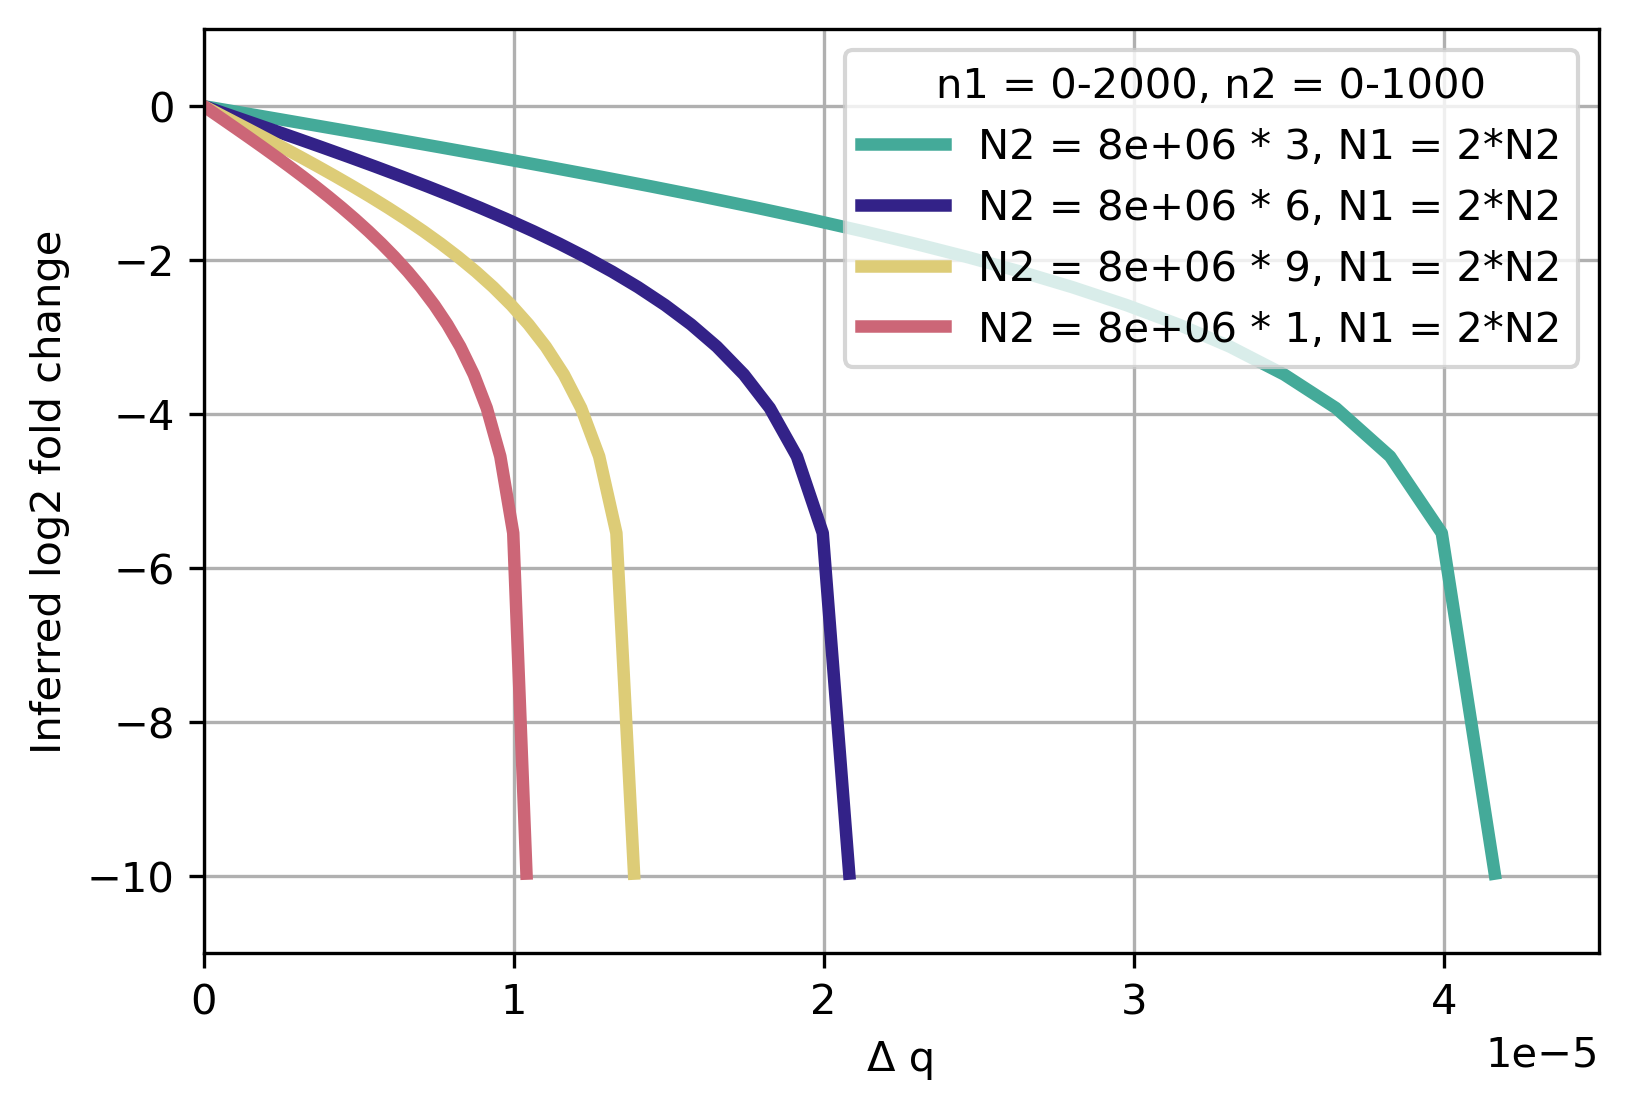

In [11]:
# delta q
# What if N_1 >> N_2 and n_1 >> n_2
# * 2

u_1 = 1
u_2 = 1


n_1 = np.flip(np.linspace(0, 1000, 50, dtype=int)) * 2
n_2 = np.linspace(0, 1000, 50, dtype=int)

plt.figure(dpi=300, figsize=(6,4))


plt.subplot()
plt.xlim(0.0, 0.000045)
plt.ylim(-11, 1)
plt.grid(True)

# 3 average yeast replicate
N_1 = 8e+06 * 3 * 2
N_2 = 8e+06 * 3


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#44AA99', linestyle='-',
        label='N2 = 8e+06 * 3, N1 = 2*N2')

plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ q')

# 6 average yeast replicate
N_1 = 8e+06 * 6 * 2
N_2 = 8e+06 * 6


x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#332288', linestyle='-',
        label='N2 = 8e+06 * 6, N1 = 2*N2')

# 9 average yeast replicate
N_1 = 8e+06 * 9 * 2
N_2 = 8e+06 * 9

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#DDCC77', linestyle='-',
        label='N2 = 8e+06 * 9, N1 = 2*N2')

# 12 average yeast replicate
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

x1 = get_q(n_1, N_1)-get_q(n_2, N_2)
y1 = get_FC(N_1, n_1, N_2, n_2)

plt.plot(x1, y1, 
        lw=3, color='#CC6677', linestyle='-',
        label='N2 = 8e+06 * 1, N1 = 2*N2')

plt.legend(title='n1 = 0-2000, n2 = 0-1000', loc='upper right')
plt.show()

# exported as 2Dsupp2 for the manuscript


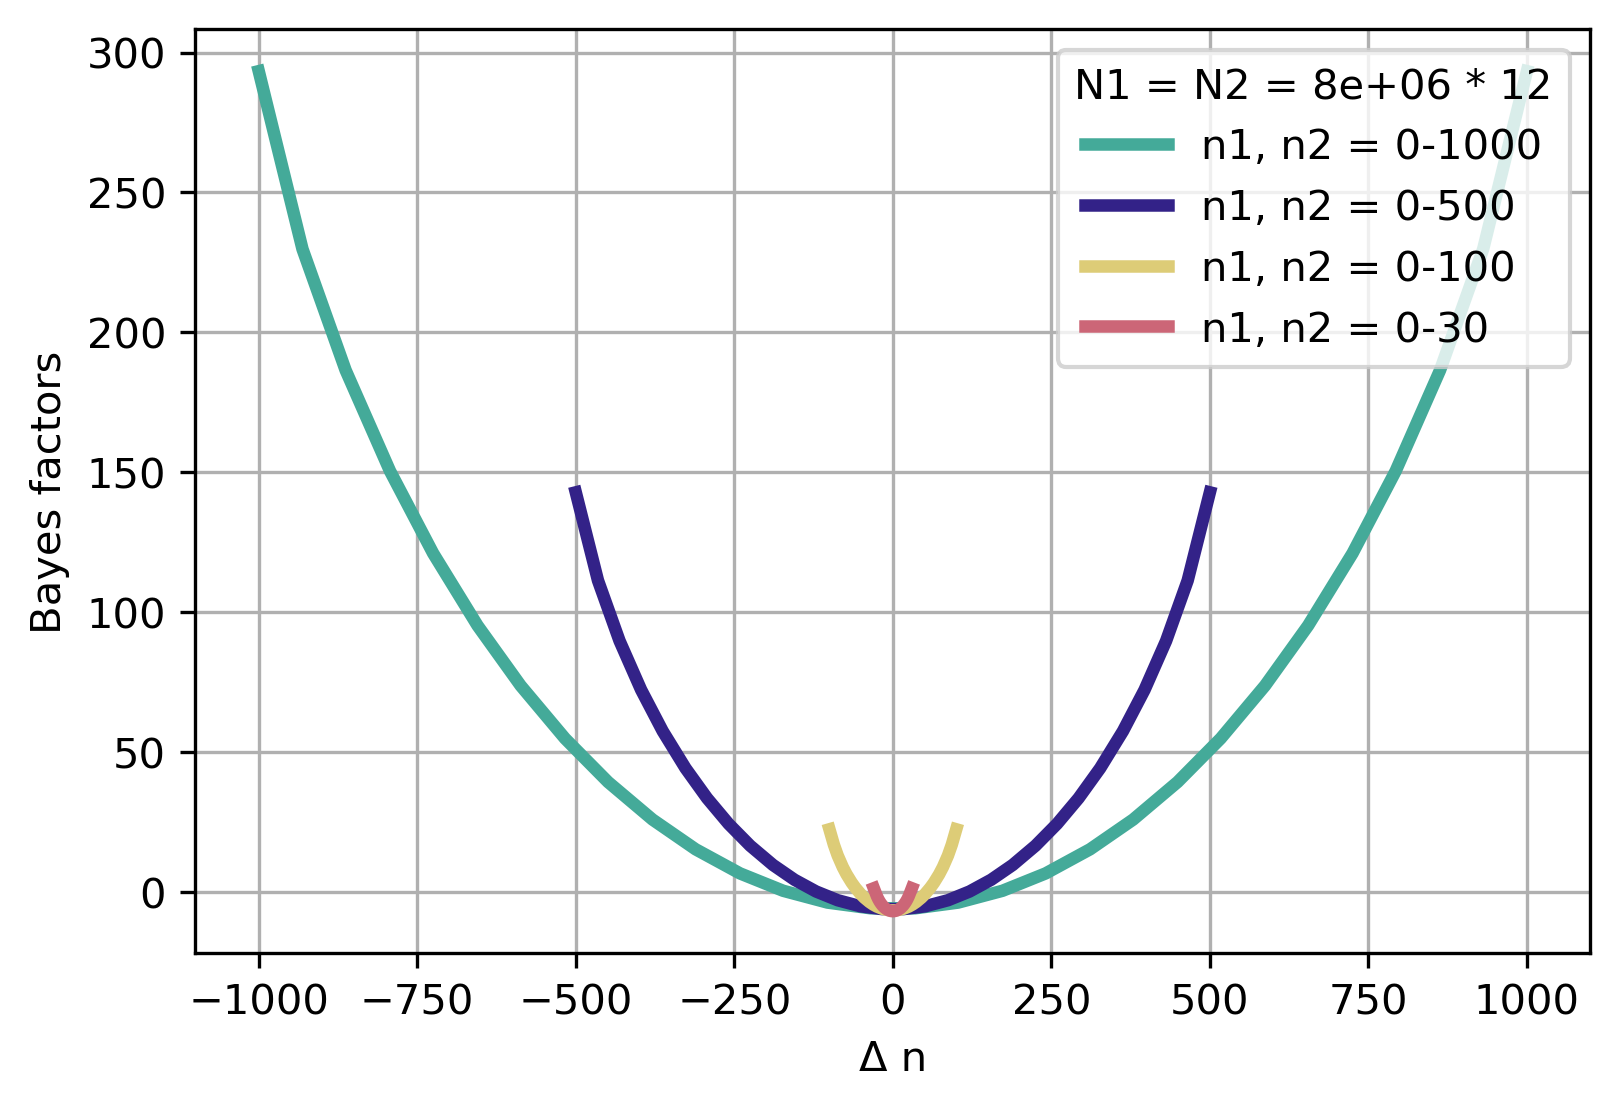

In [12]:
plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicates
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 30, dtype=int))
n_2 = np.linspace(0, 1000, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#44AA99', linestyle='-', label='n1, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 30, dtype=int))
n_2 = np.linspace(0, 500, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#332288', linestyle='-', label='n1, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 30, dtype=int))
n_2 = np.linspace(0, 100, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 30, dtype=int))
n_2 = np.linspace(0, 30, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#CC6677', linestyle='-', label='n1, n2 = 0-30')


plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factors')
plt.xlabel('Δ n')
plt.legend(title='N1 = N2 = 8e+06 * 12', loc='upper right')

plt.show()

# saved as 2A for paper

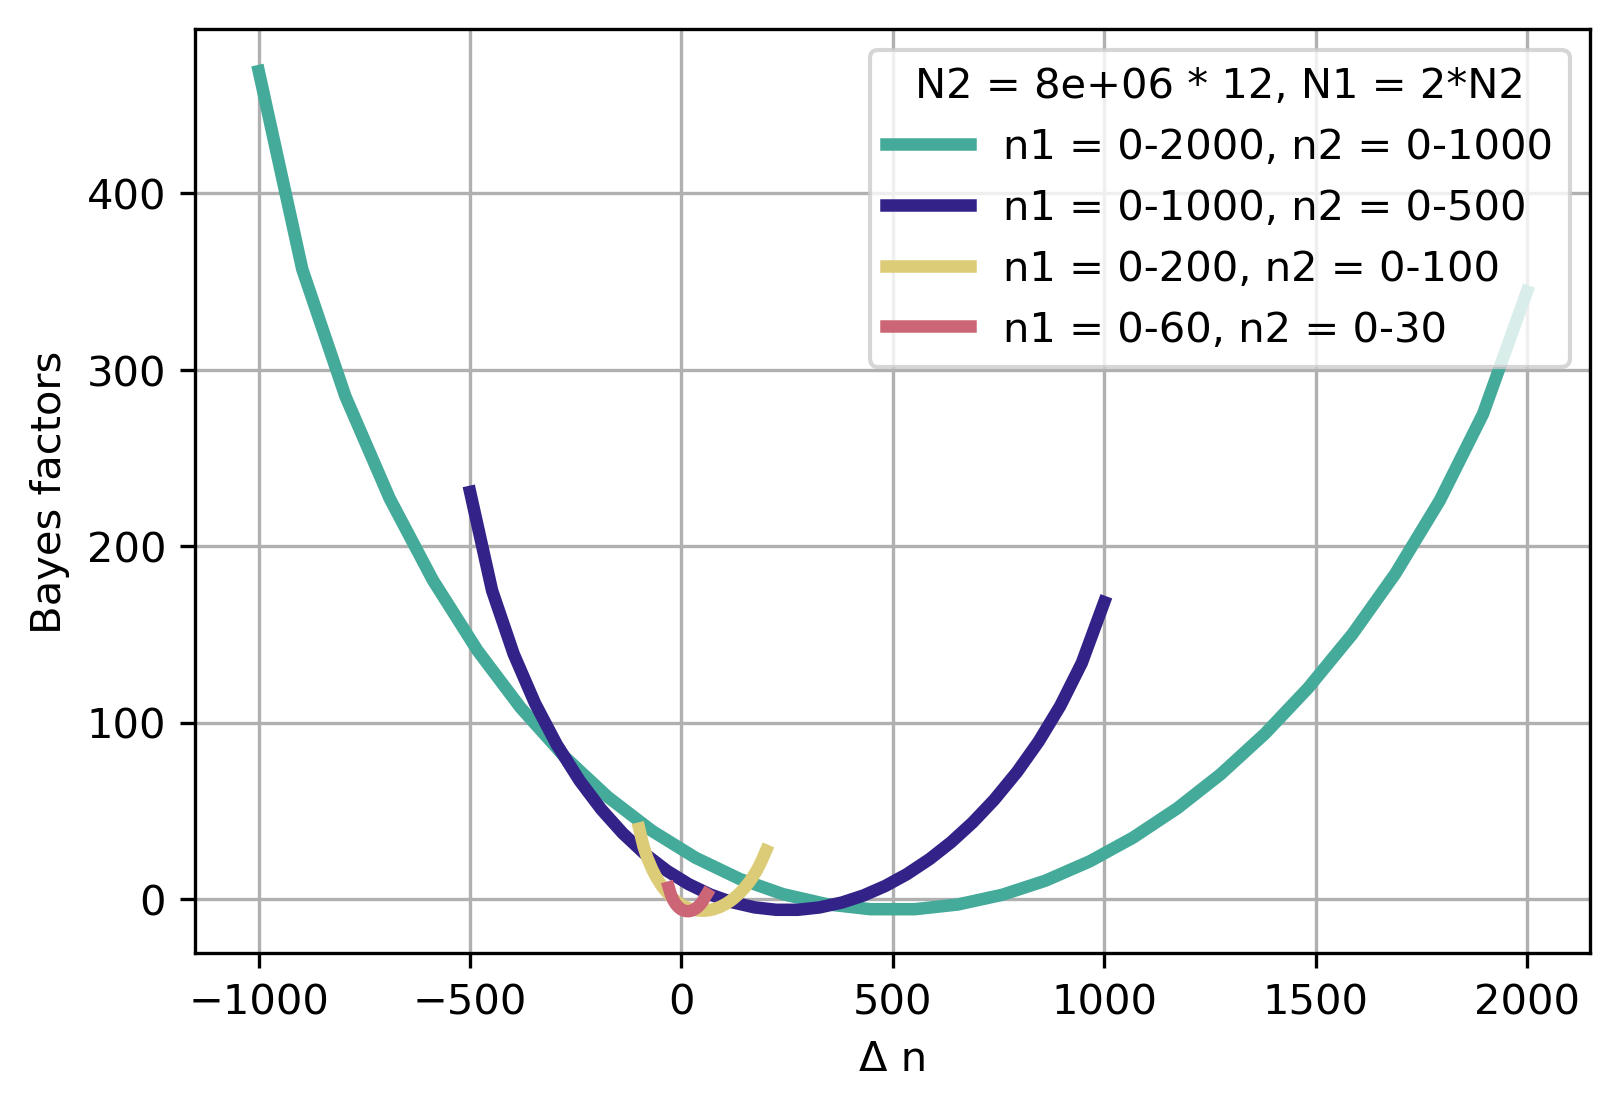

In [13]:
# What happens if N_1 >> N_2 (and therefore also n_1 >> n_2)
# * 2

plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicates
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 30, dtype=int)) * 2
n_2 = np.linspace(0, 1000, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#44AA99', linestyle='-', label='n1 = 0-2000, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 30, dtype=int)) * 2
n_2 = np.linspace(0, 500, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#332288', linestyle='-', label='n1 = 0-1000, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 30, dtype=int)) * 2
n_2 = np.linspace(0, 100, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1 = 0-200, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 30, dtype=int)) * 2
n_2 = np.linspace(0, 30, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#CC6677', linestyle='-', label='n1 = 0-60, n2 = 0-30')


plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factors')
plt.xlabel('Δ n')
plt.legend(title='N2 = 8e+06 * 12, N1 = 2*N2', loc='upper right')

plt.show()

# exported as 2Bsupp2 for the manuscript

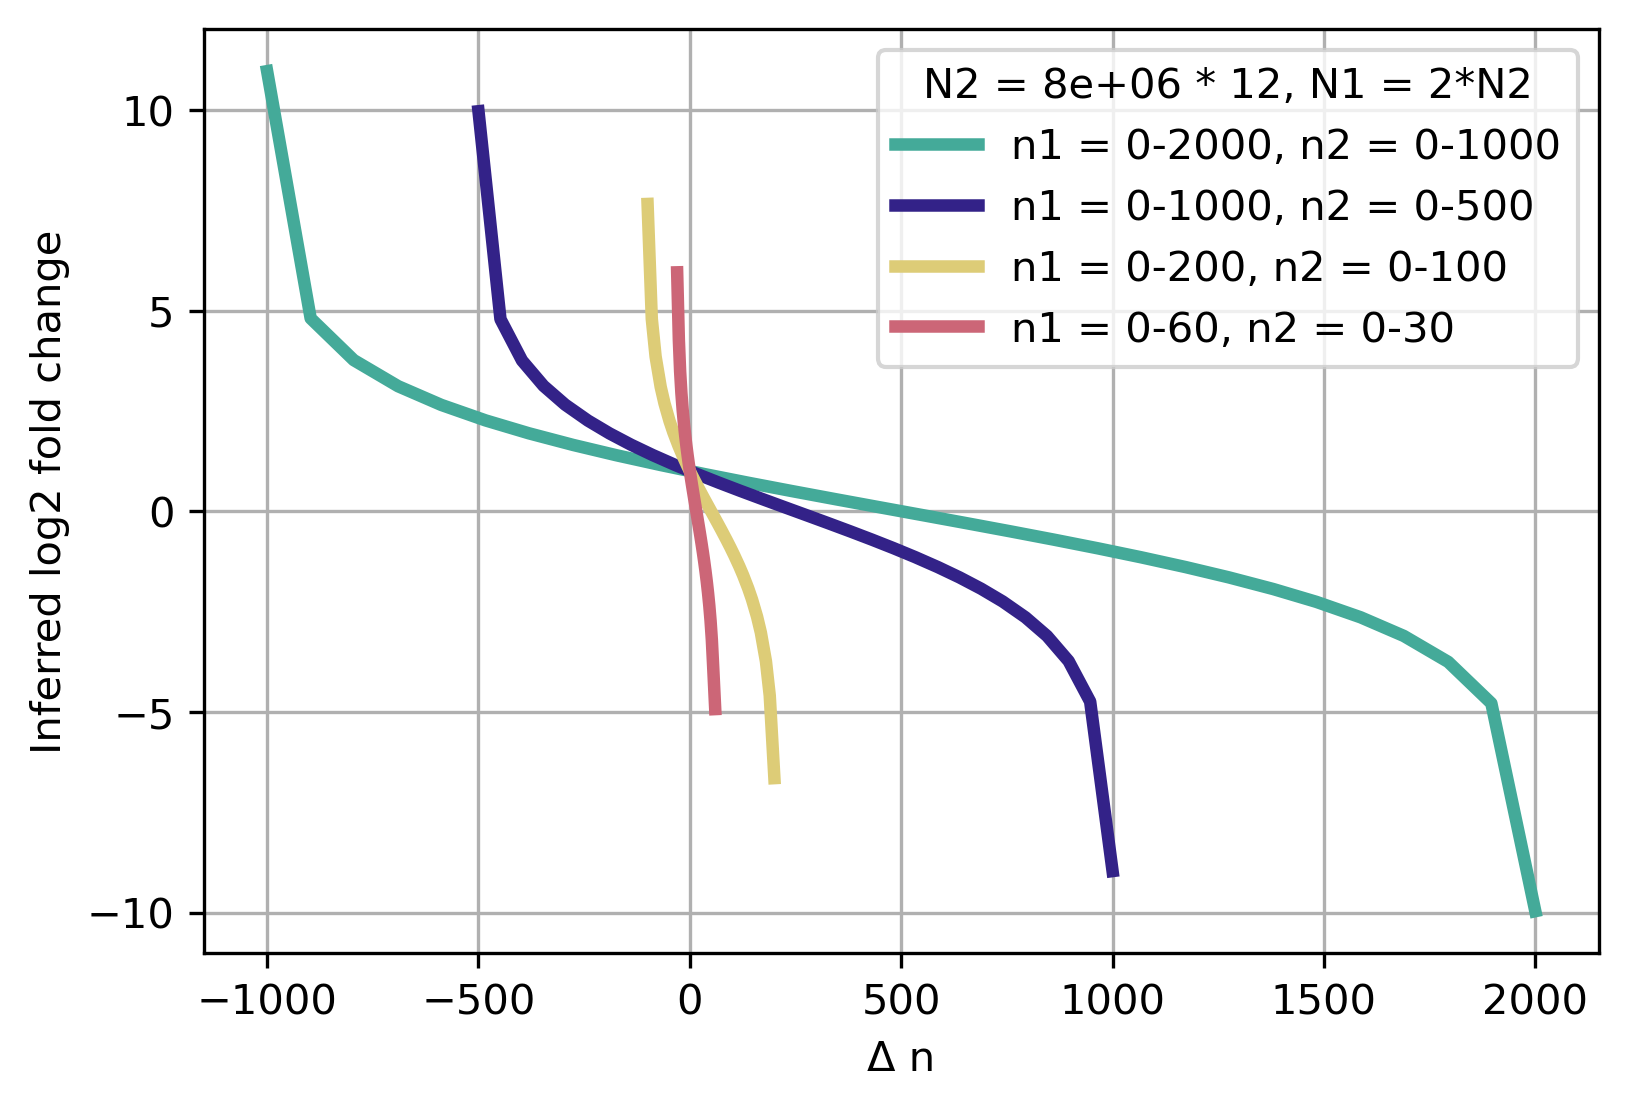

In [14]:
# What happens if N_1 >> N_2 (and therefore also n_1 >> n_2)
# * 2

plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicates
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 30, dtype=int)) * 2
n_2 = np.linspace(0, 1000, 30, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#44AA99', linestyle='-', label='n1 = 0-2000, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 30, dtype=int)) * 2
n_2 = np.linspace(0, 500, 30, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#332288', linestyle='-', label='n1 = 0-1000, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 30, dtype=int)) * 2
n_2 = np.linspace(0, 100, 30, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1 = 0-200, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 30, dtype=int)) * 2
n_2 = np.linspace(0, 30, 30, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#CC6677', linestyle='-', label='n1 = 0-60, n2 = 0-30')


plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ n')
plt.legend(title='N2 = 8e+06 * 12, N1 = 2*N2', loc='upper right')

plt.show()

# exported as 2Bsupp2 for the manuscript

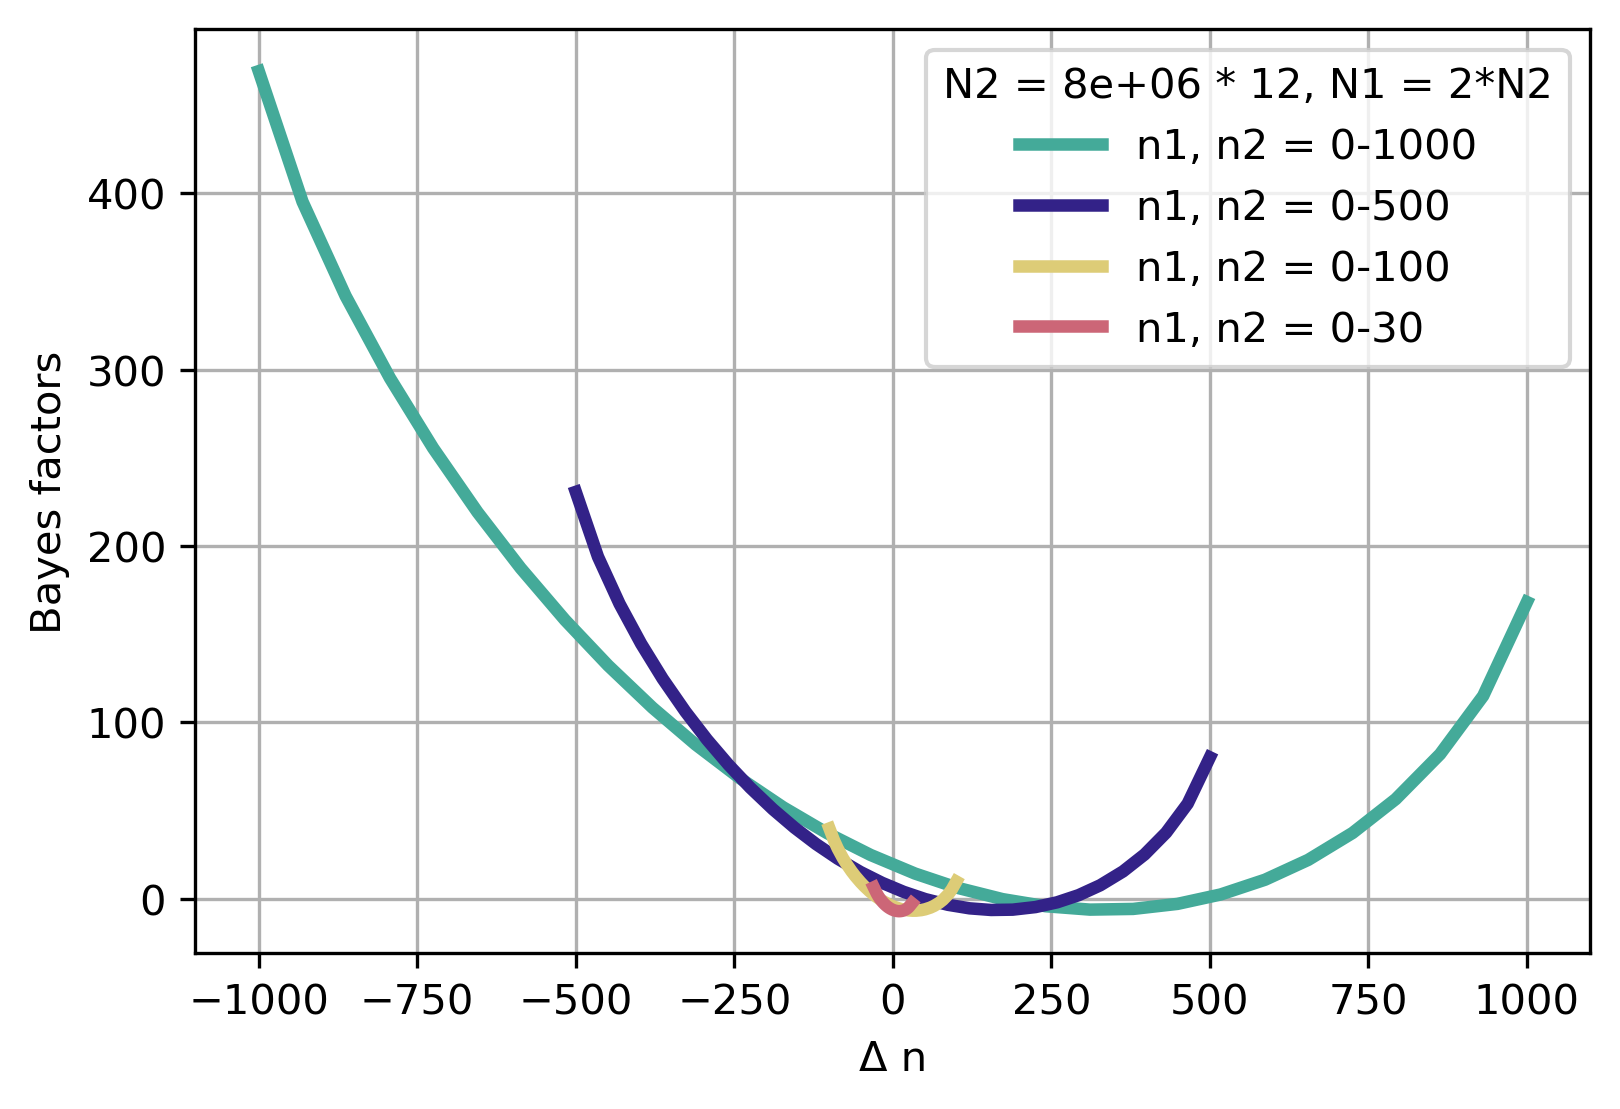

In [15]:
# What happens if N_1 >> N_2 
# but n_1 and n_2 stay between 0-1000
# * 2

plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicates
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 30, dtype=int))
n_2 = np.linspace(0, 1000, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#44AA99', linestyle='-', label='n1, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 30, dtype=int))
n_2 = np.linspace(0, 500, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#332288', linestyle='-', label='n1, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 30, dtype=int))
n_2 = np.linspace(0, 100, 30, dtype=int)

BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 30, dtype=int))
n_2 = np.linspace(0, 30, 30, dtype=int)


BFs = get_BF(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, BFs, 
        lw=3, color='#CC6677', linestyle='-', label='n1, n2 = 0-30')


plt.tick_params('x', labelbottom=True)
plt.ylabel('Bayes factors')
plt.xlabel('Δ n')
plt.legend(title='N2 = 8e+06 * 12, N1 = 2*N2', loc='upper right')

plt.show()

# exported as 2Asupp1 for the manuscript


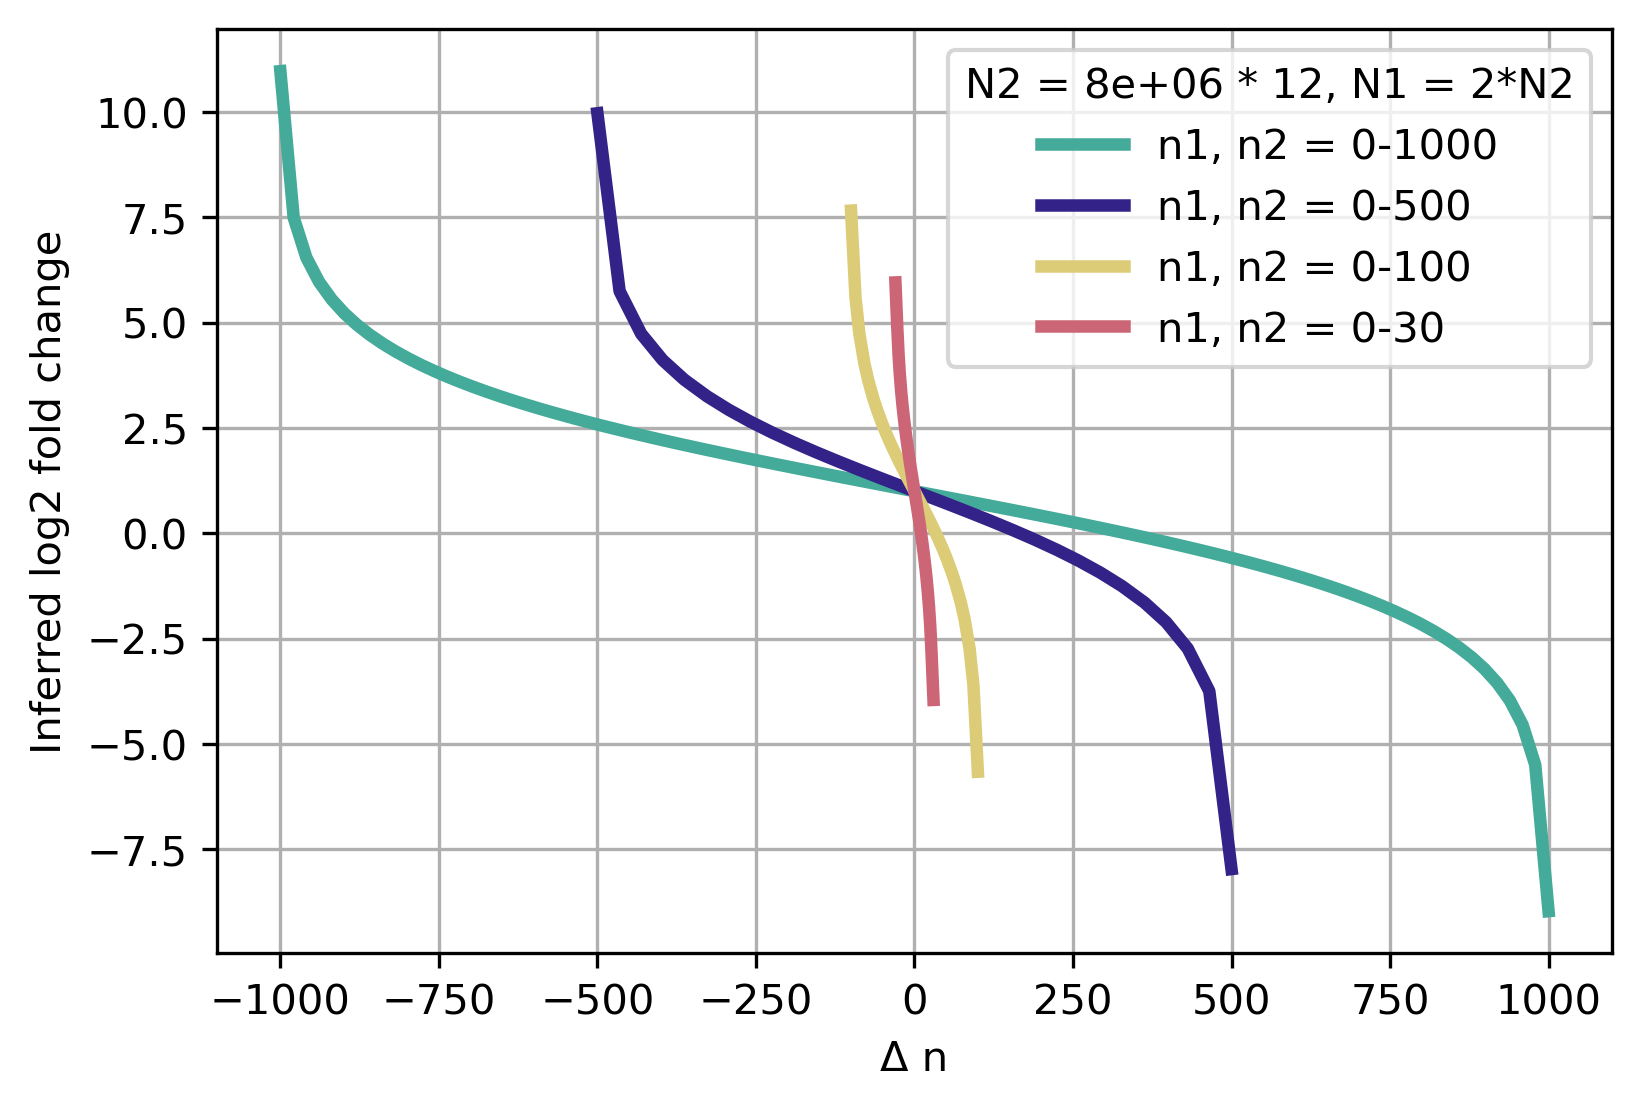

In [16]:
# What happens if N_1 >> N_2 
# but n_1 and n_2 stay between 0-1000
# * 2

plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicates
N_1 = 8e+06 * 12 * 2
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 100, dtype=int))
n_2 = np.linspace(0, 1000, 100, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#44AA99', linestyle='-', label='n1, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 30, dtype=int))
n_2 = np.linspace(0, 500, 30, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#332288', linestyle='-', label='n1, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 30, dtype=int))
n_2 = np.linspace(0, 100, 30, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 30, dtype=int))
n_2 = np.linspace(0, 30, 30, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#CC6677', linestyle='-', label='n1, n2 = 0-30')


plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ n')
plt.legend(title='N2 = 8e+06 * 12, N1 = 2*N2', loc='upper right')

plt.show()

# saved as 2Bsupp1 for paper

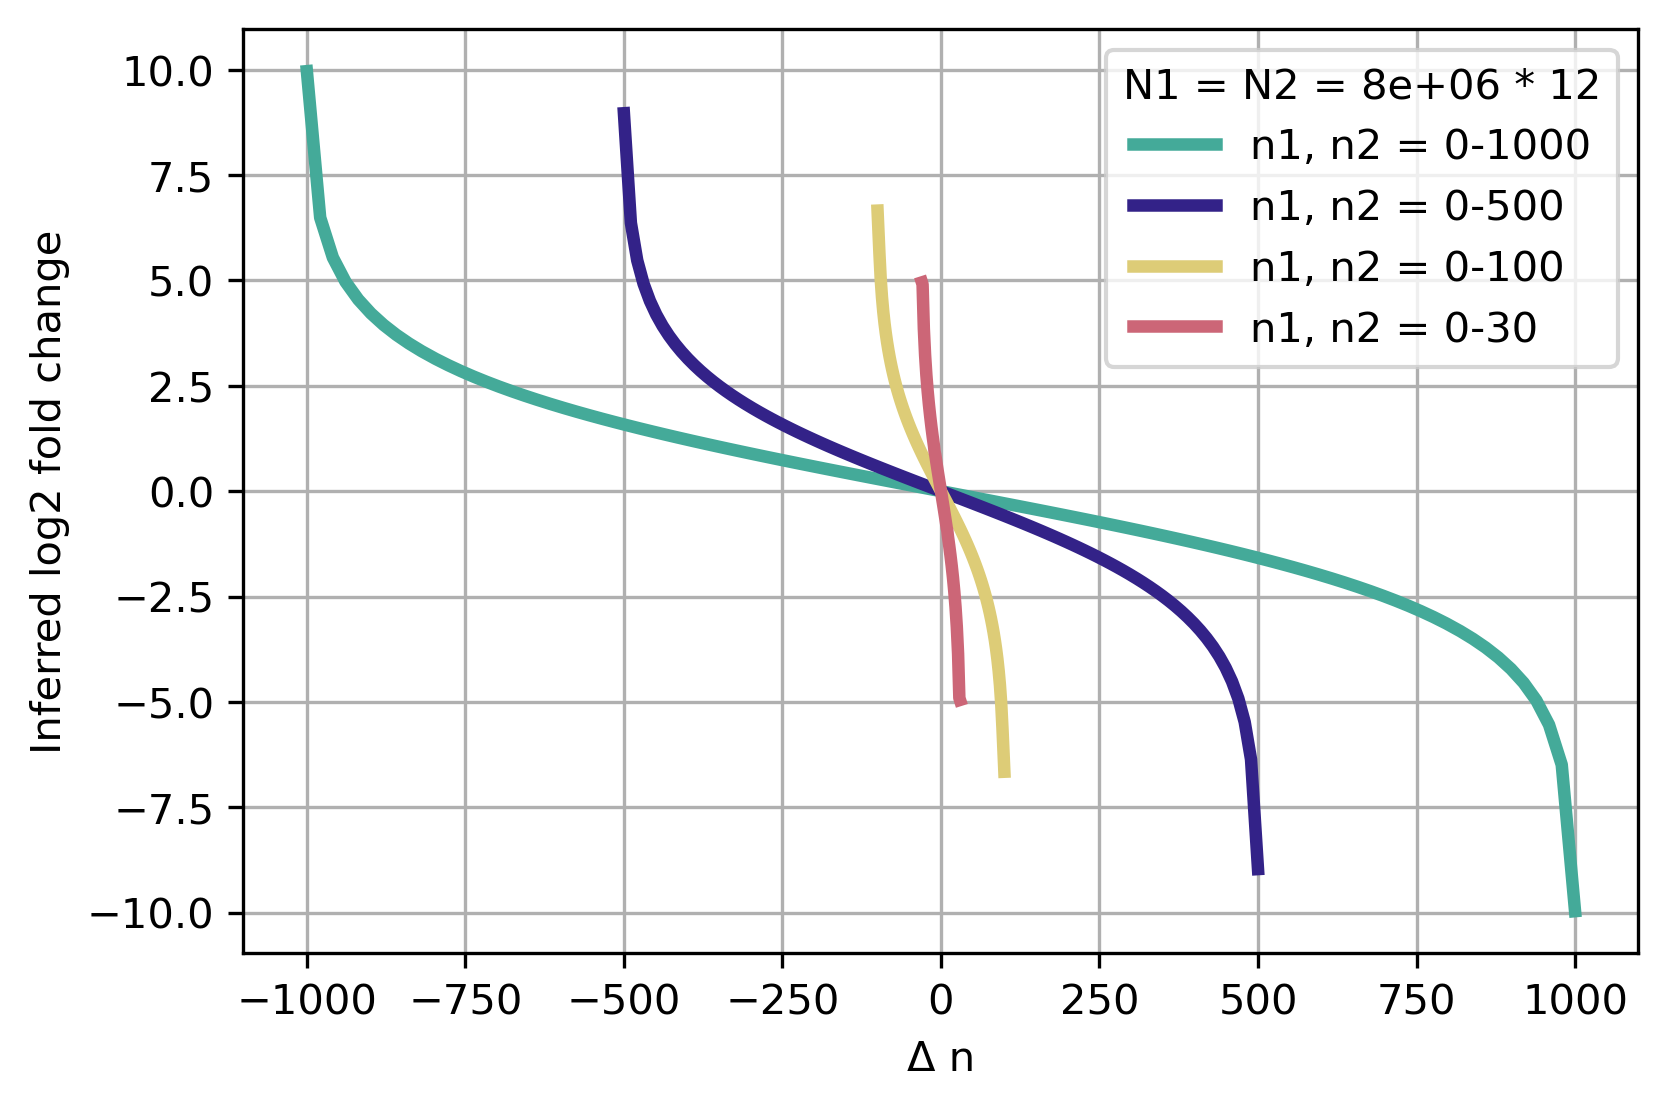

In [17]:
plt.figure(dpi=300, figsize=(6,4))

plt.subplot()

plt.grid(True)

# 12 average yeast replicate
N_1 = 8e+06 * 12
N_2 = 8e+06 * 12

n_1 = np.flip(np.linspace(0, 1000, 100, dtype=int))
n_2 = np.linspace(0, 1000, 100, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#44AA99', linestyle='-', label='n1, n2 = 0-1000')


n_1 = np.flip(np.linspace(0, 500, 100, dtype=int))
n_2 = np.linspace(0, 500, 100, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#332288', linestyle='-', label='n1, n2 = 0-500')

n_1 = np.flip(np.linspace(0, 100, 100, dtype=int))
n_2 = np.linspace(0, 100, 100, dtype=int)

FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#DDCC77', linestyle='-', label='n1, n2 = 0-100')

n_1 = np.flip(np.linspace(0, 30, 100, dtype=int))
n_2 = np.linspace(0, 30, 100, dtype=int)


FCs = get_FC(N_1, n_1, N_2, n_2)

plt.plot(n_1-n_2, FCs, 
        lw=3, color='#CC6677', linestyle='-', label='n1, n2 = 0-30')



plt.tick_params('x', labelbottom=True)
plt.ylabel('Inferred log2 fold change')
plt.xlabel('Δ n')

plt.legend(title='N1 = N2 = 8e+06 * 12', loc='upper right')


plt.show()

# saved as 2B for paper

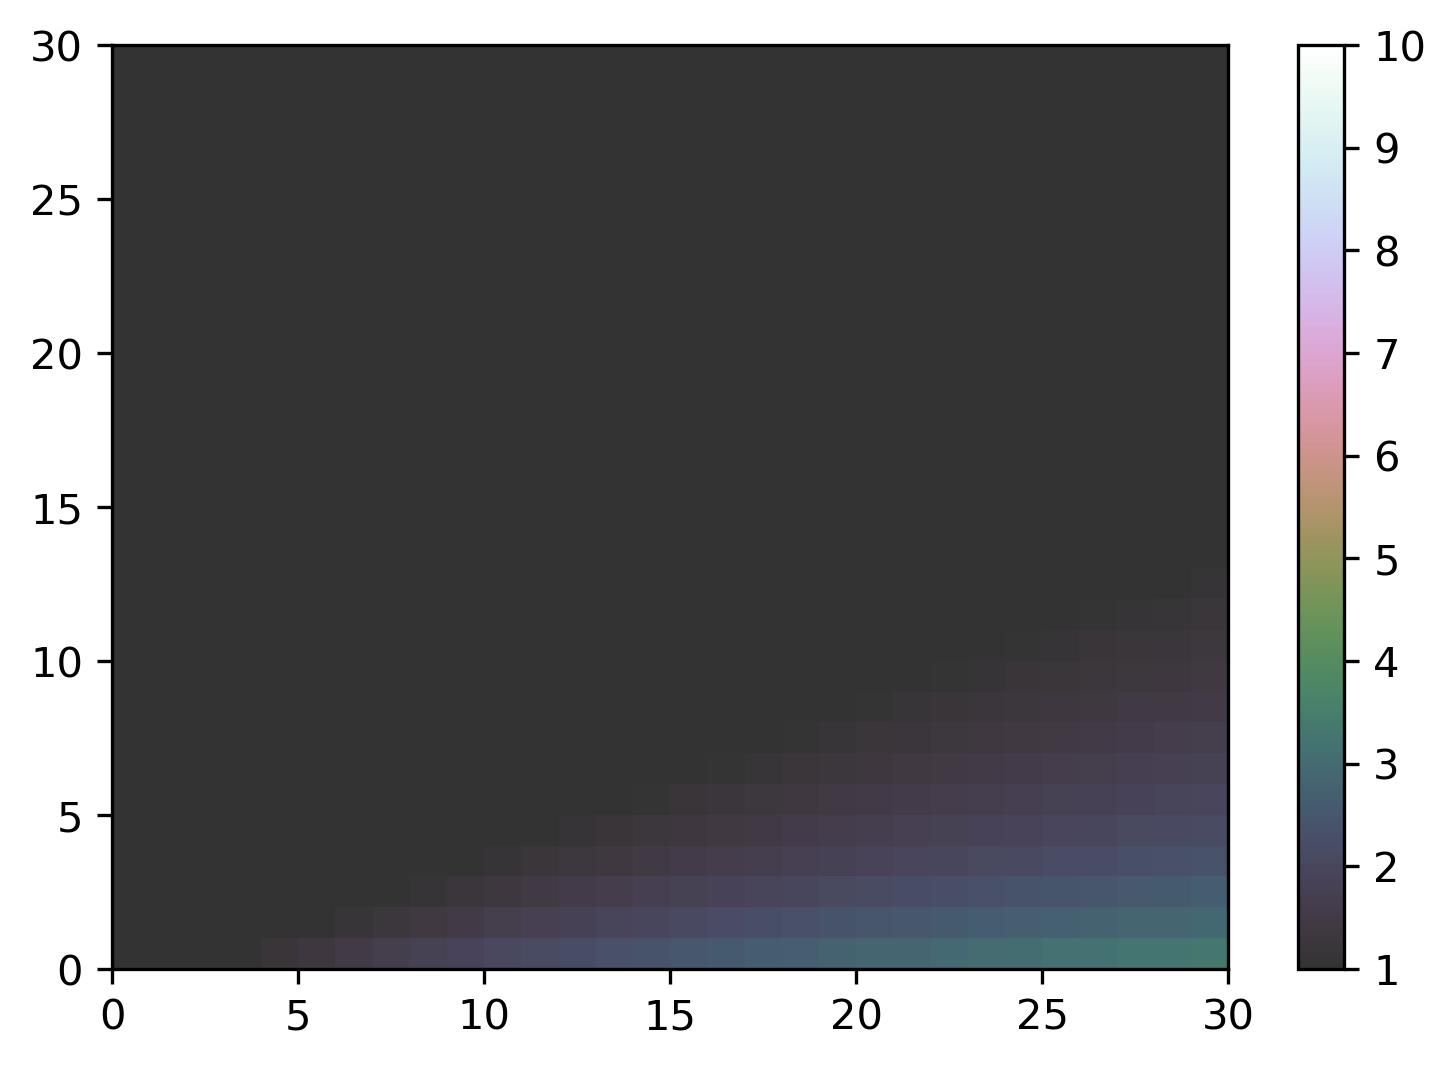

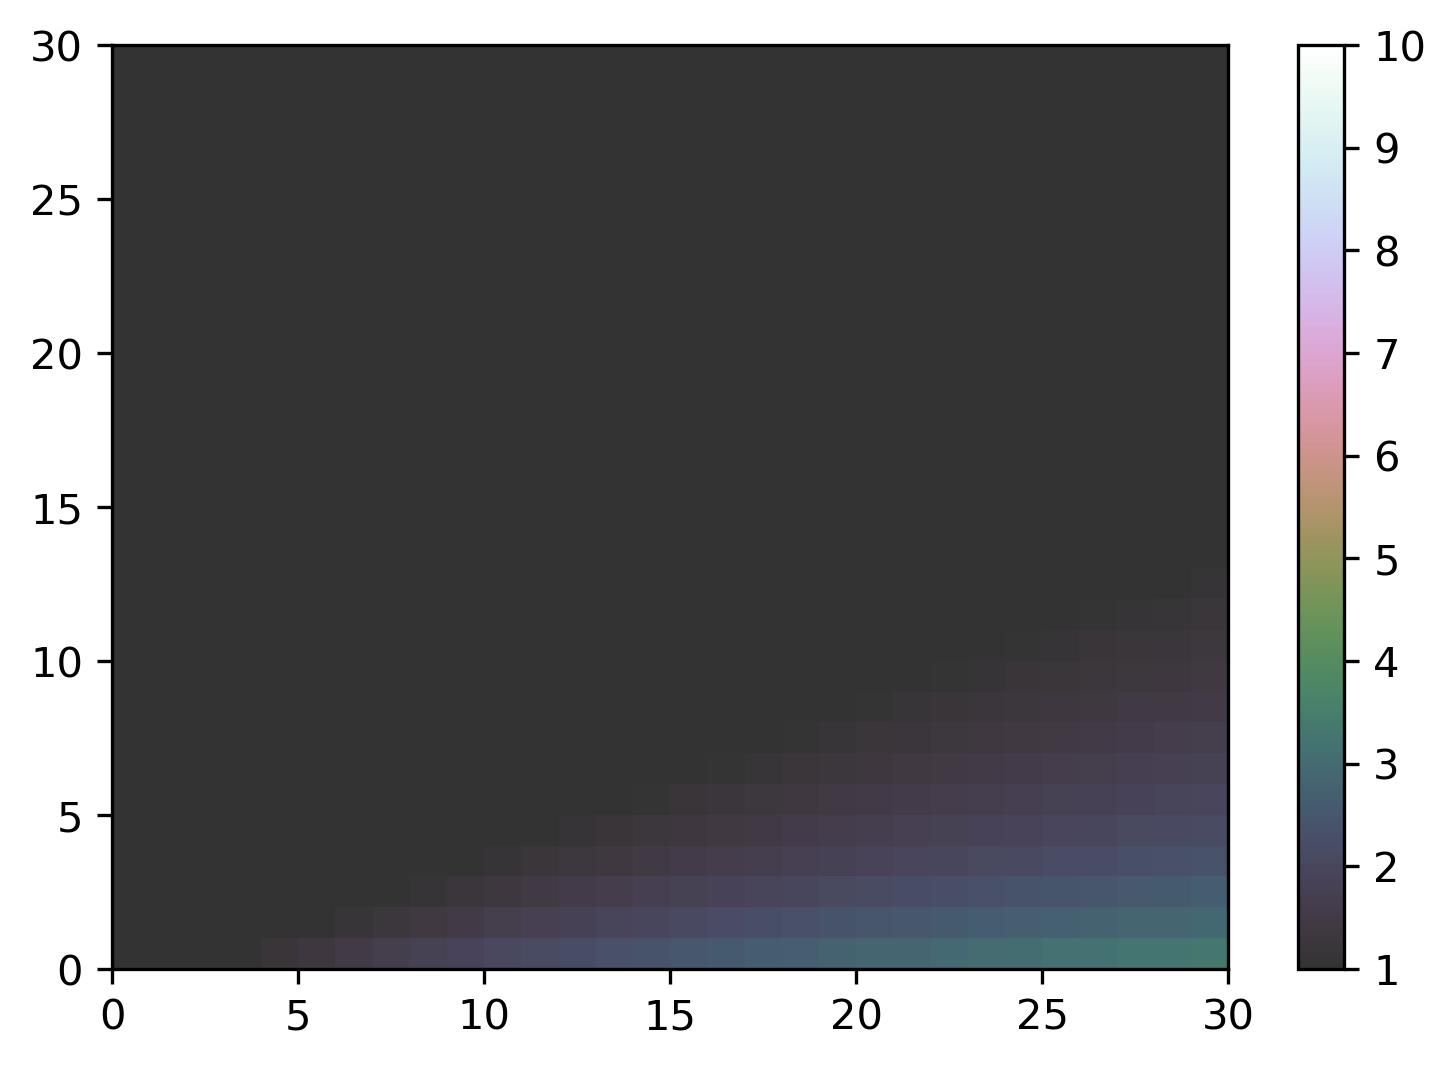

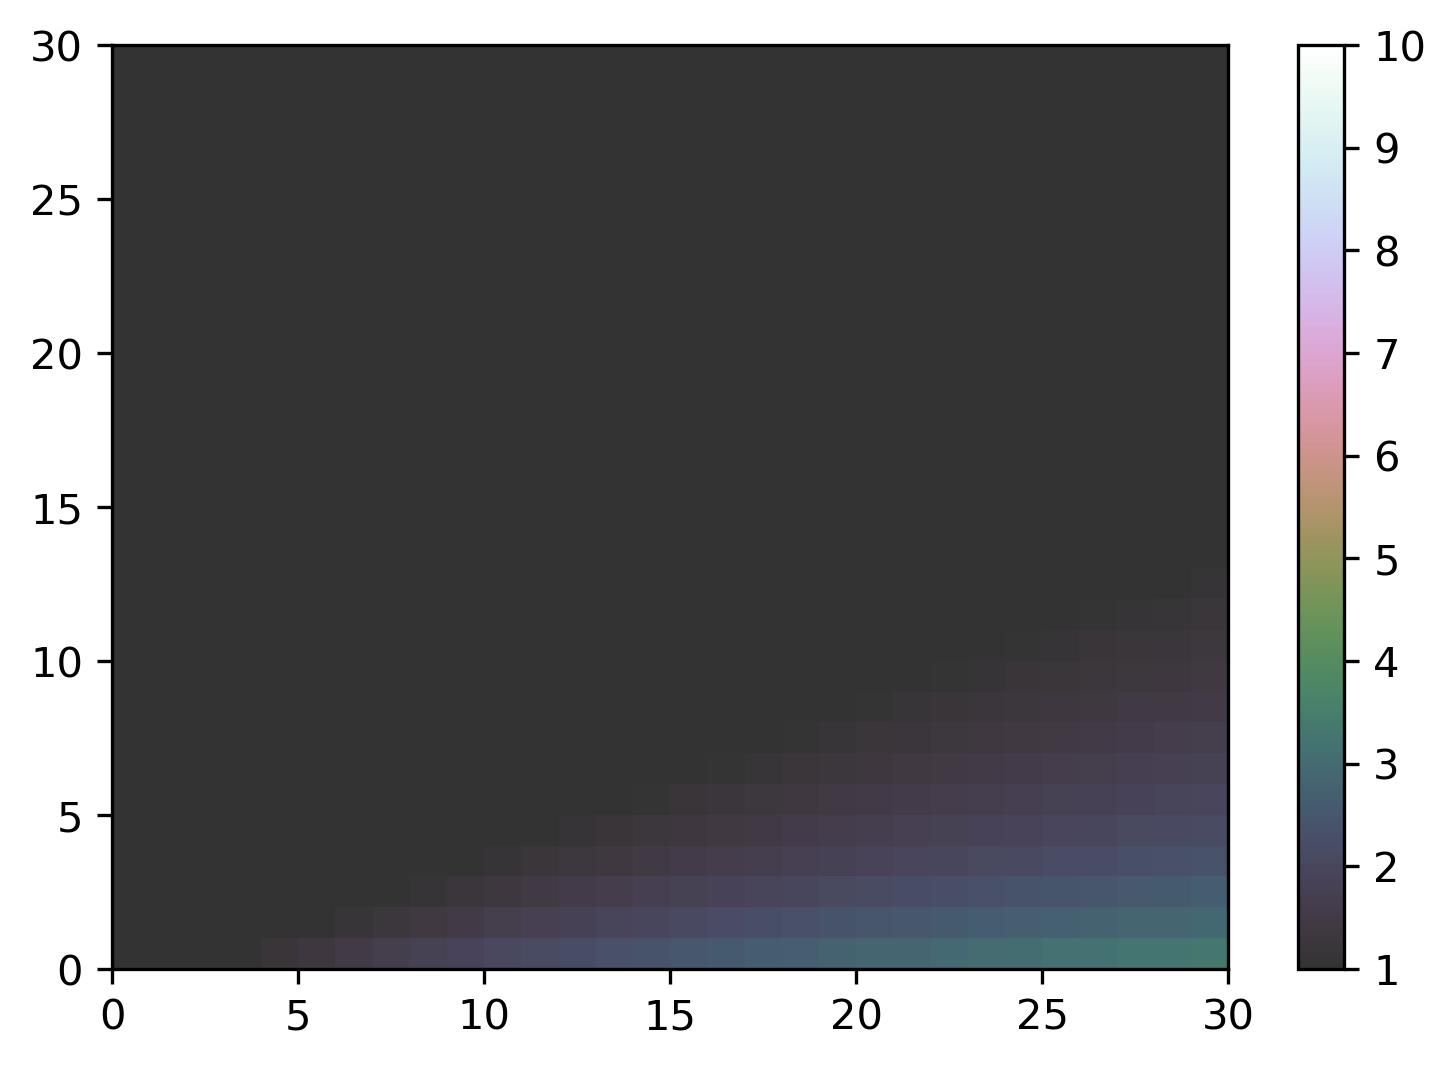

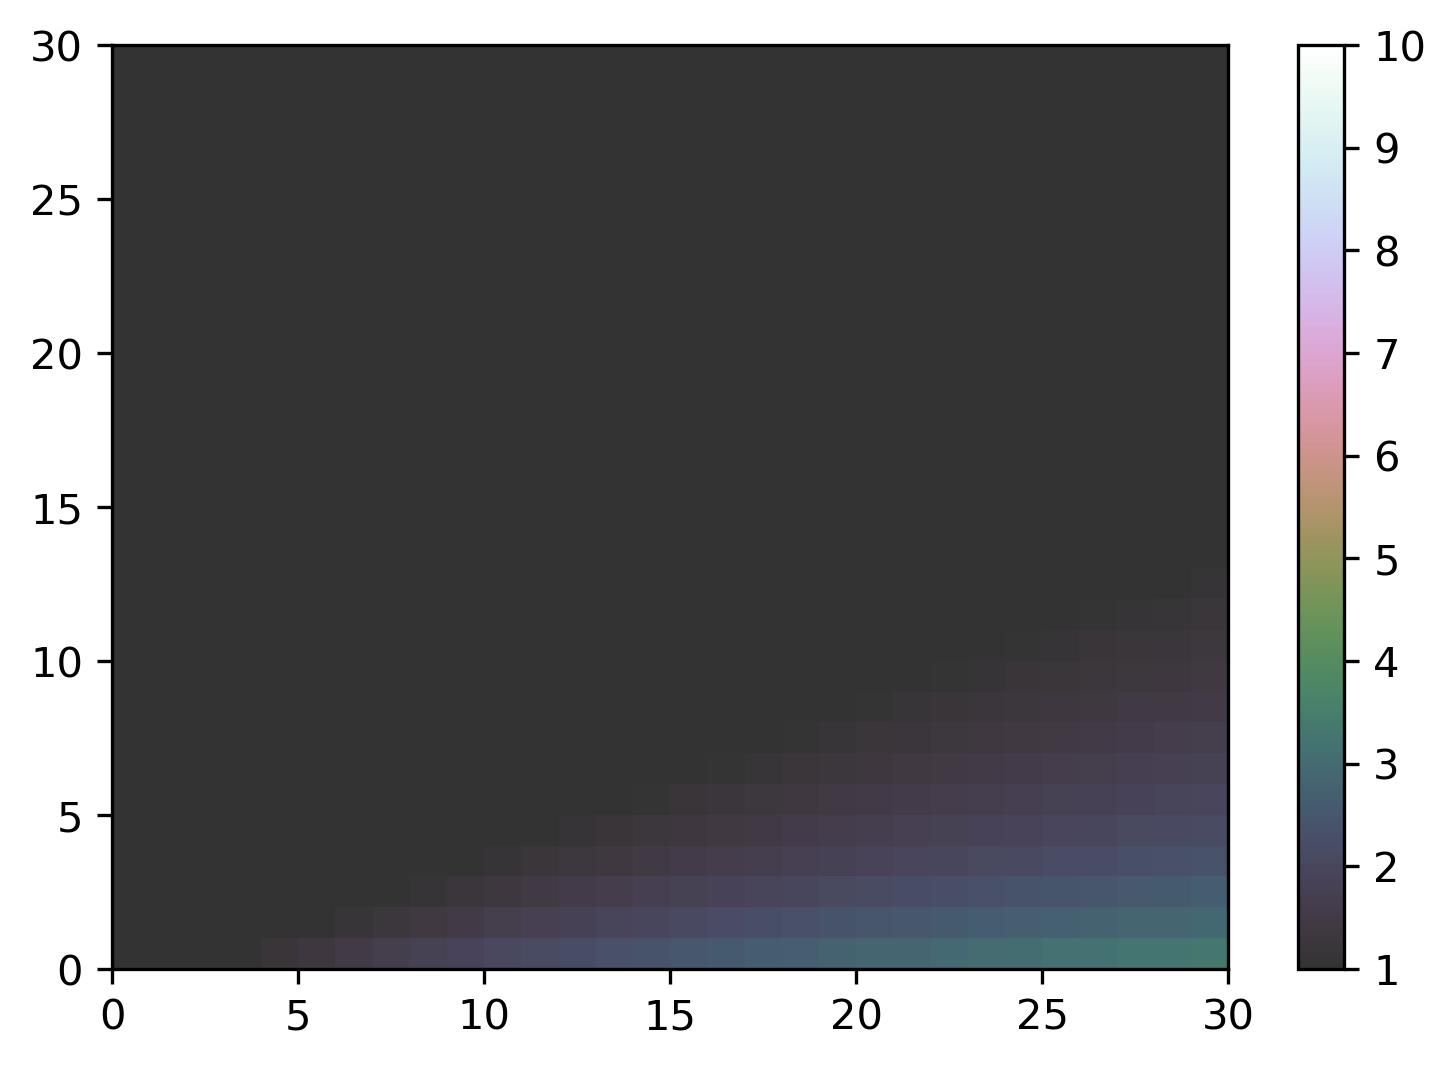

In [18]:
# n 100-1000


def heatmap(z):

    plt.figure(figsize=(6,4), dpi=300)
    plt.pcolormesh(z, cmap='cubehelix', alpha=0.8, norm=m.colors.Normalize(vmin=1, vmax=10))
    

    plt.colorbar()

    plt.show()


n_1 = np.linspace(100, 1000, 30, dtype=int)
n_2 = np.linspace(100, 1000, 30, dtype=int)

for reps in [3,6,9,12]:

    FCs = np.array([get_FC(8e+06 * reps, n_1, 8e+06 * reps, n_2) for n_1, n_2 in itertools.product(n_1, n_2)]).reshape((30, 30))

    heatmap(FCs)

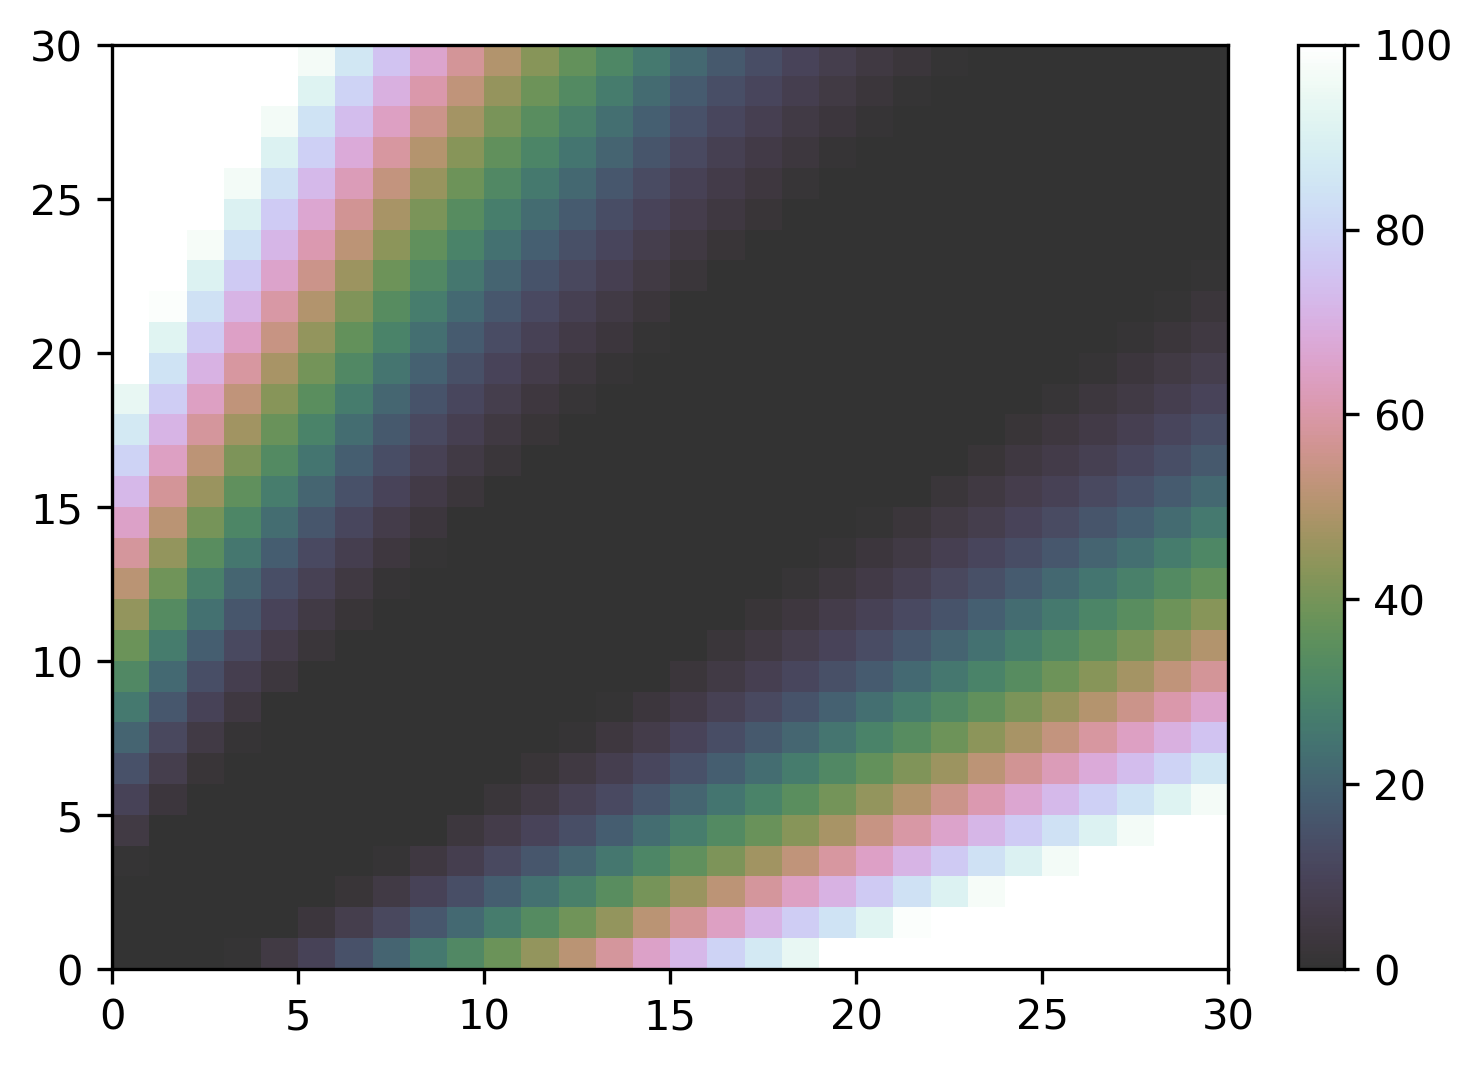

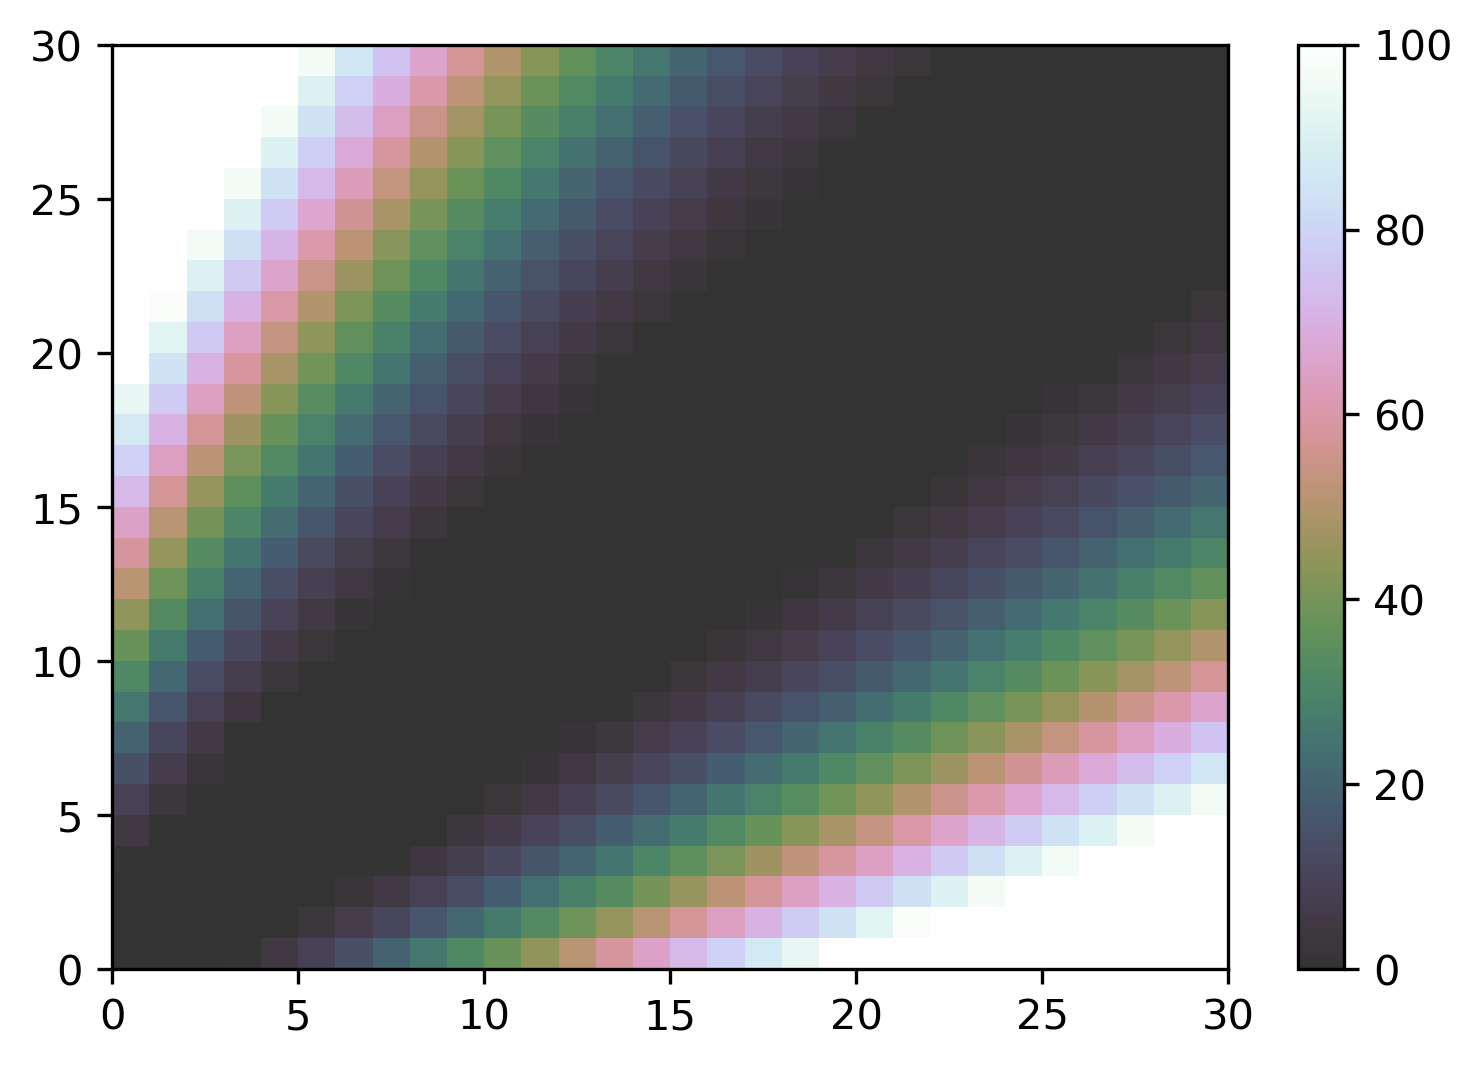

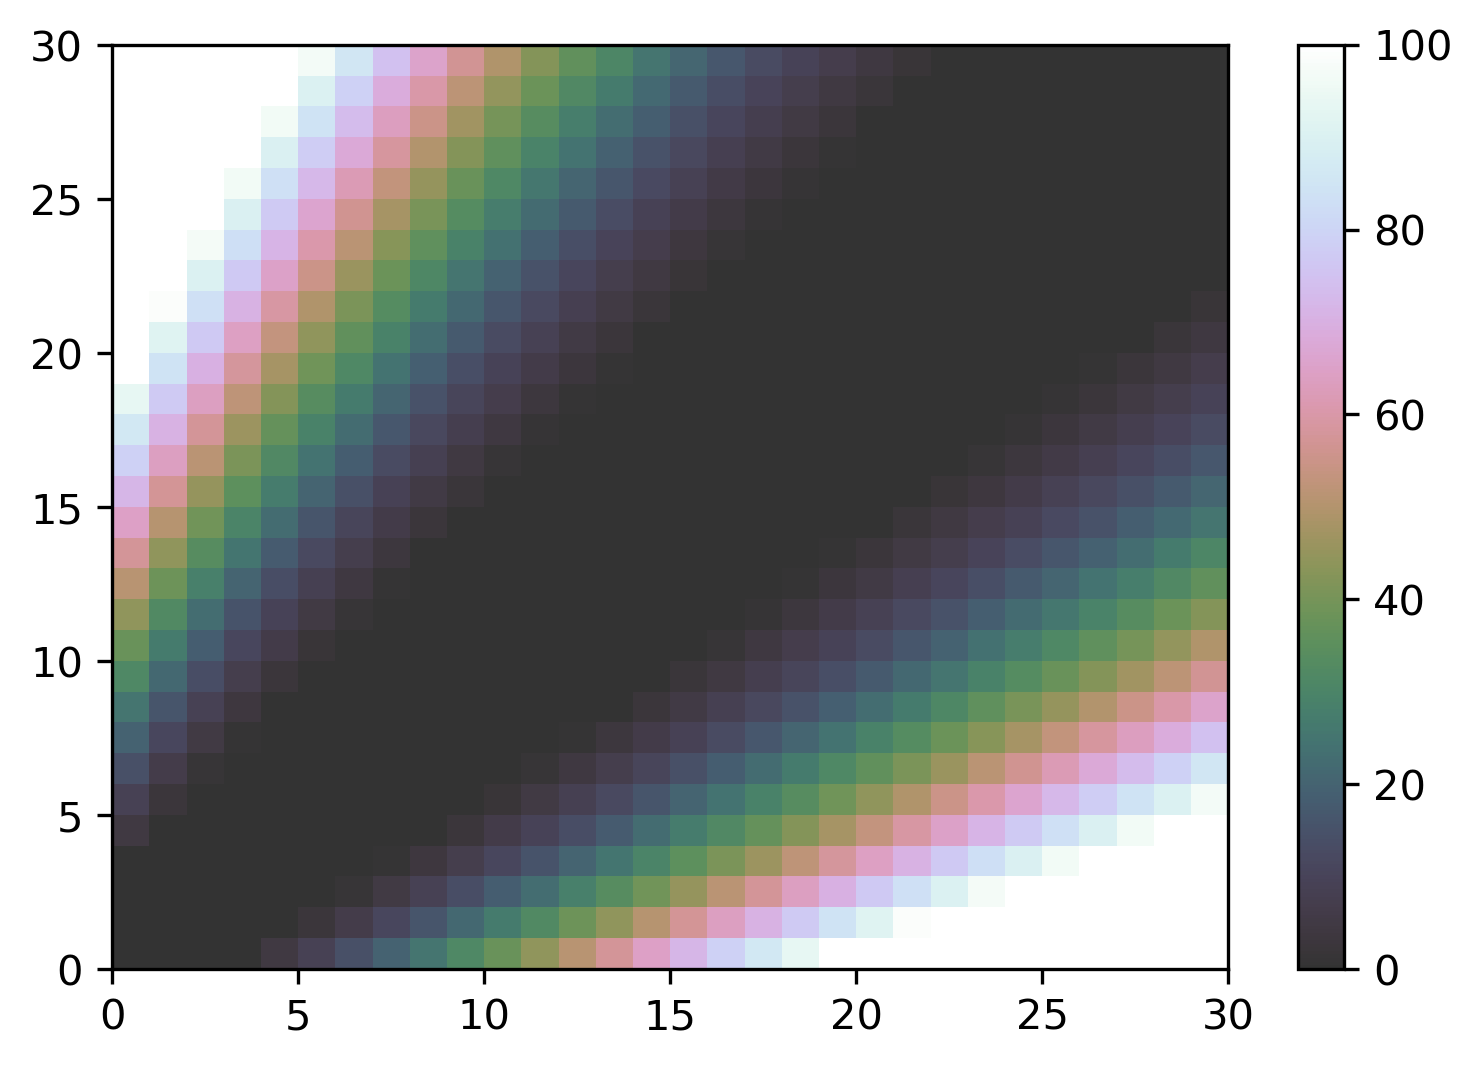

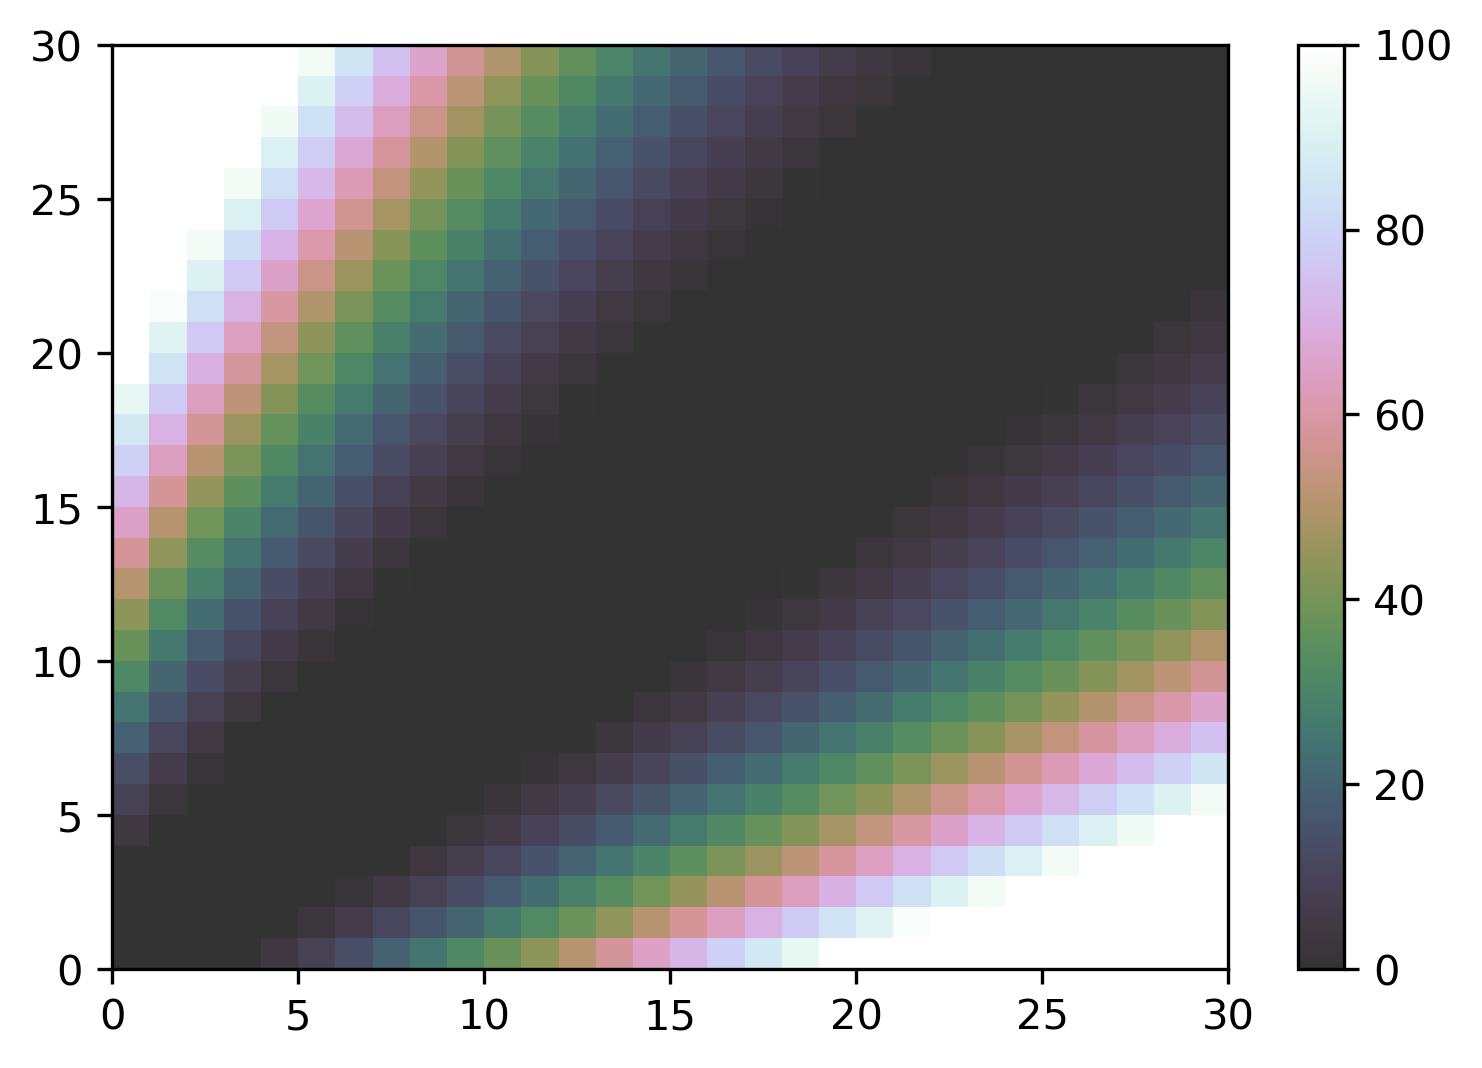

In [19]:
# n 100-1000


def heatmap(z):

    plt.figure(figsize=(6,4), dpi=300)
    plt.pcolormesh(z, cmap='cubehelix', alpha=0.8, norm=m.colors.Normalize(vmin=0, vmax=100))
    

    plt.colorbar()

    plt.show()


n_1 = np.linspace(100, 1000, 30, dtype=int)
n_2 = np.linspace(100, 1000, 30, dtype=int)

for reps in [3,6,9,12]:

    BFs = np.array([get_BF(8e+06 * reps, n_1, 8e+06 * reps, n_2) for n_1, n_2 in itertools.product(n_1, n_2)]).reshape((30, 30))

    heatmap(BFs)

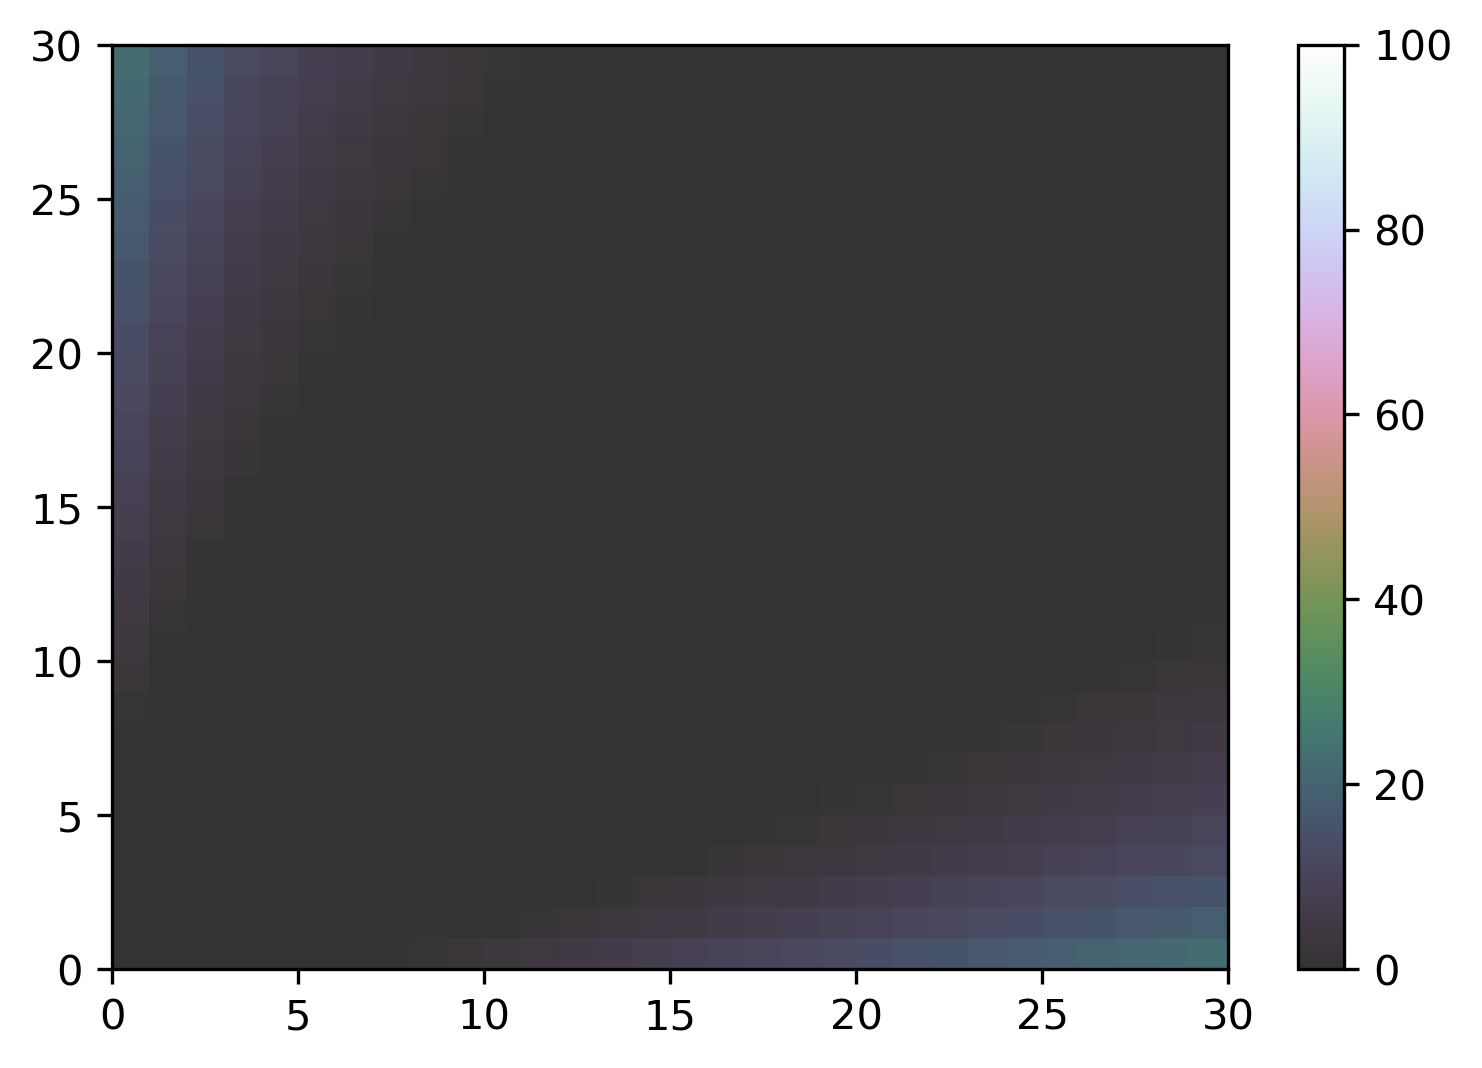

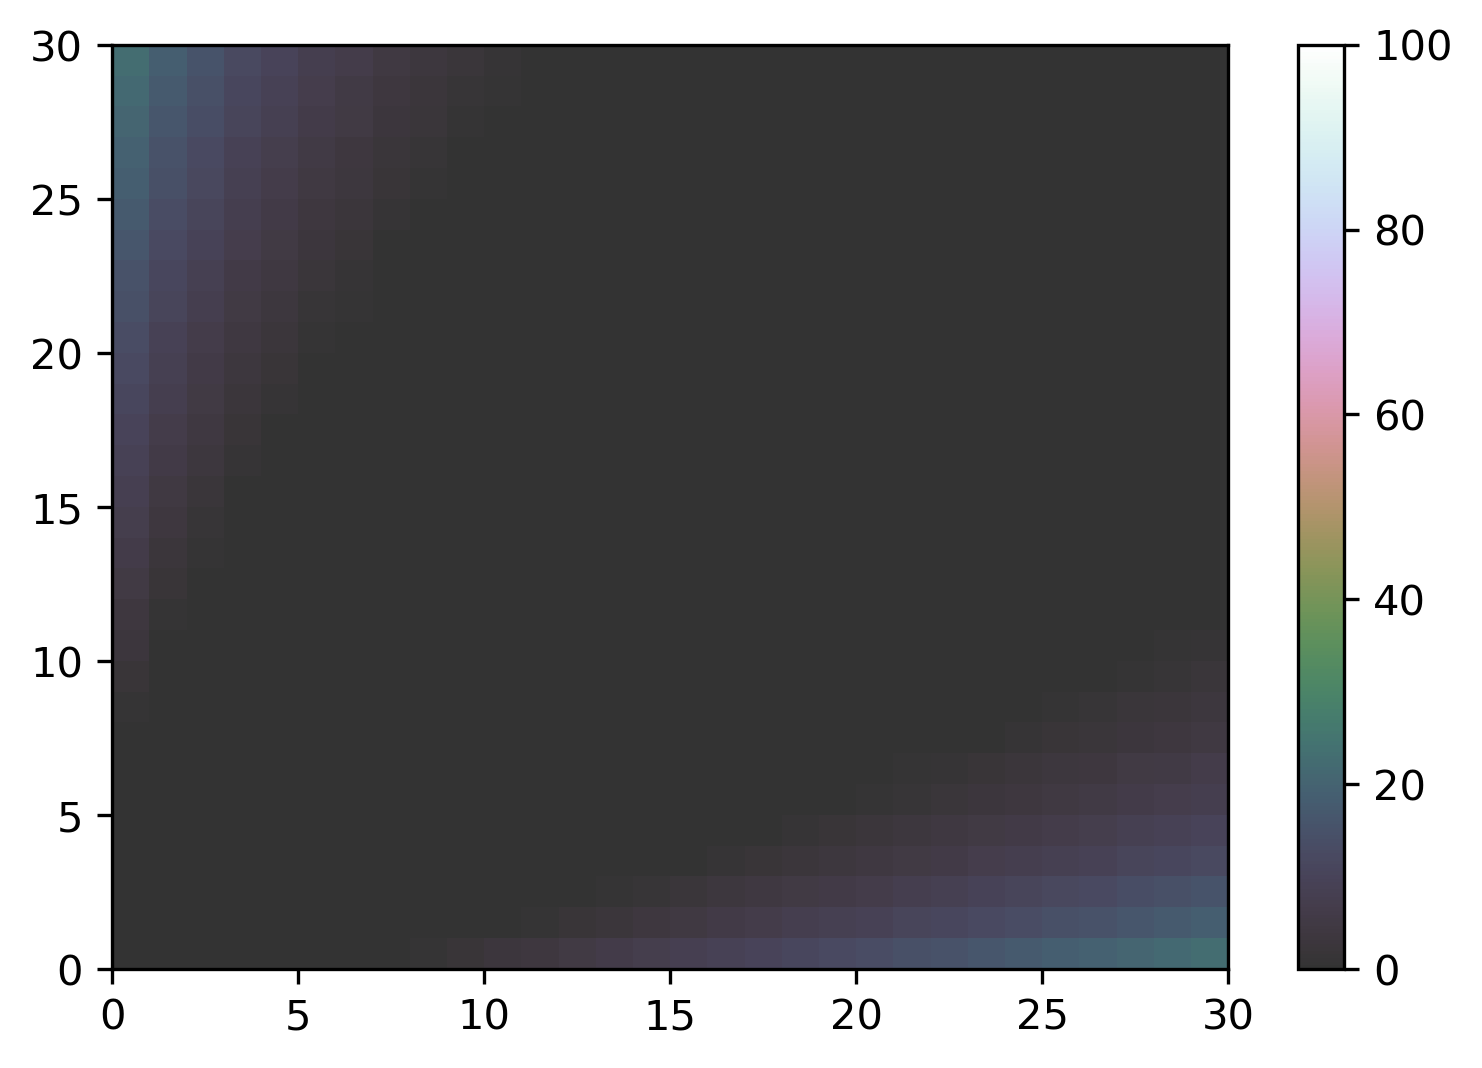

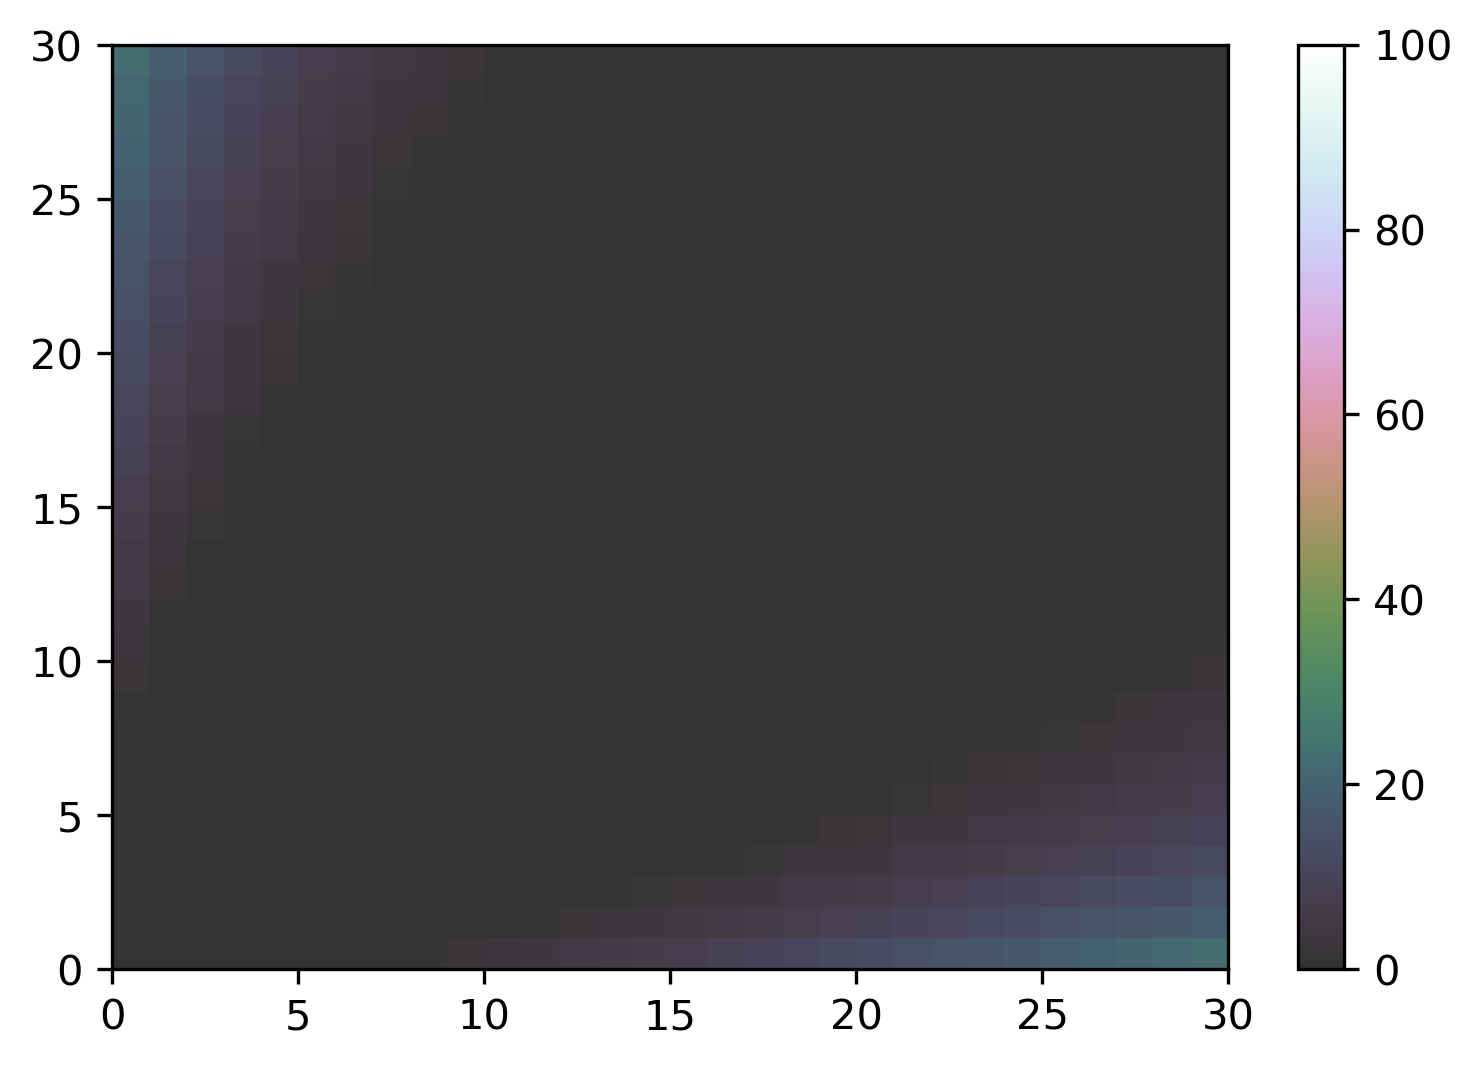

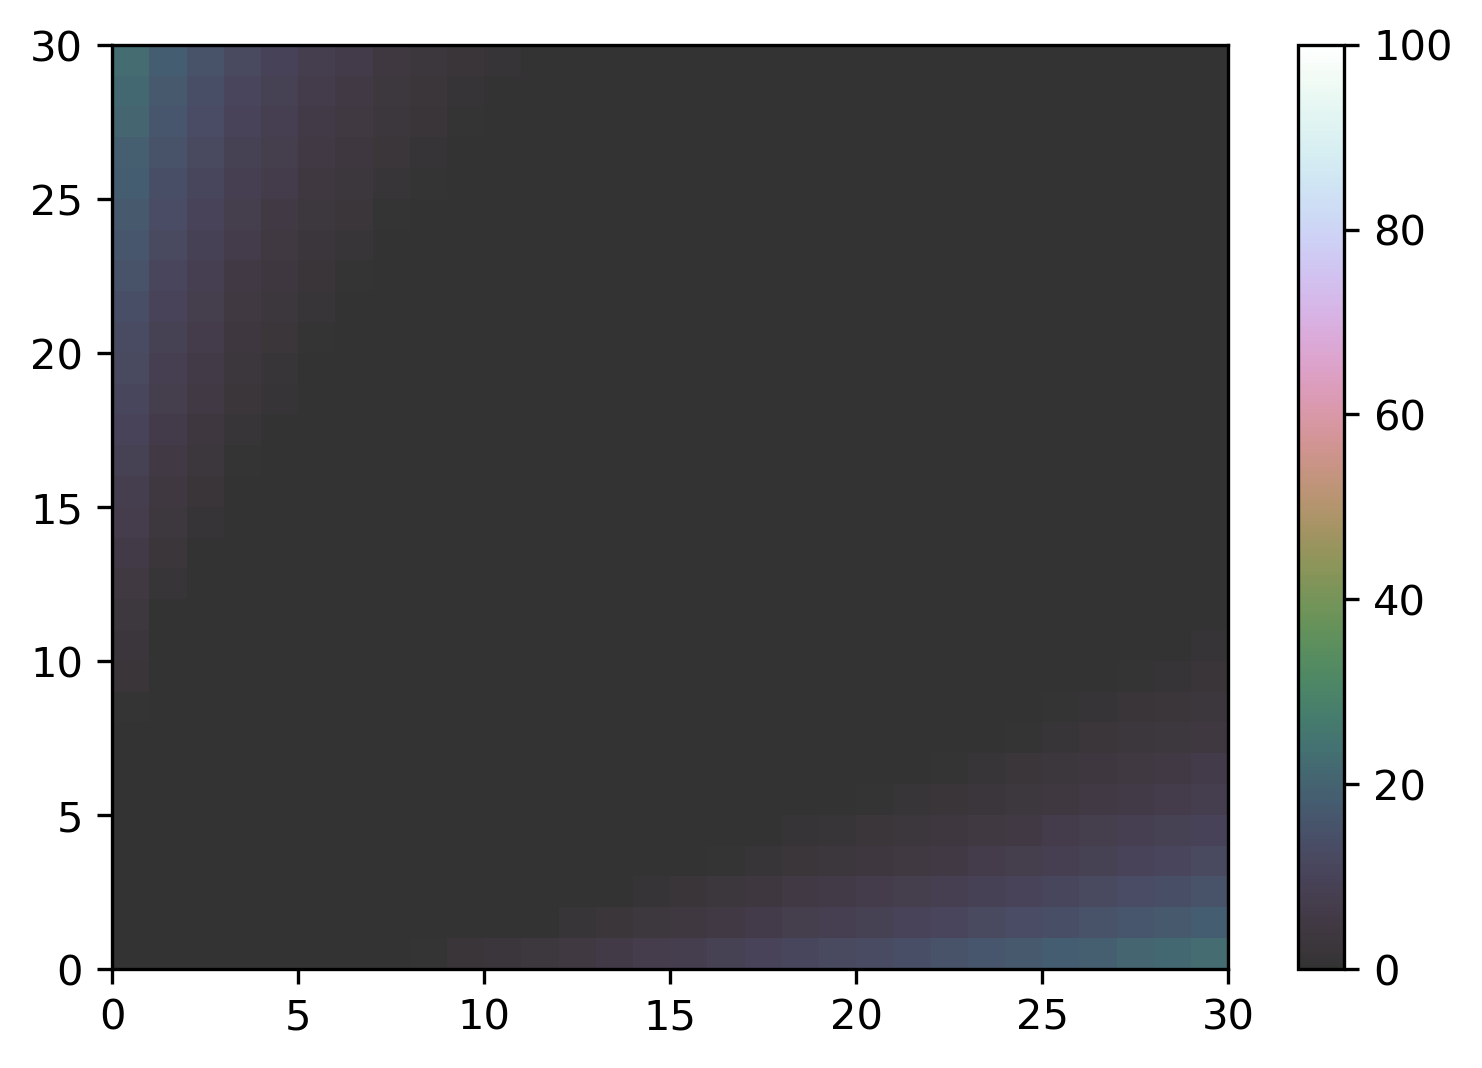

In [20]:
# n 1-100


def heatmap(z):

    plt.figure(figsize=(6,4), dpi=300)
    plt.pcolormesh(z, cmap='cubehelix', alpha=0.8, norm=m.colors.Normalize(vmin=0, vmax=100))
    

    plt.colorbar()

    plt.show()


n_1 = np.linspace(0, 100, 30, dtype=int)
n_2 = np.linspace(0, 100, 30, dtype=int)

for reps in [3,6,9,12]:

    BFs = np.array([get_BF(8e+06 * reps, n_1, 8e+06 * reps, n_2) for n_1, n_2 in itertools.product(n_1, n_2)]).reshape((30, 30))

    heatmap(BFs)

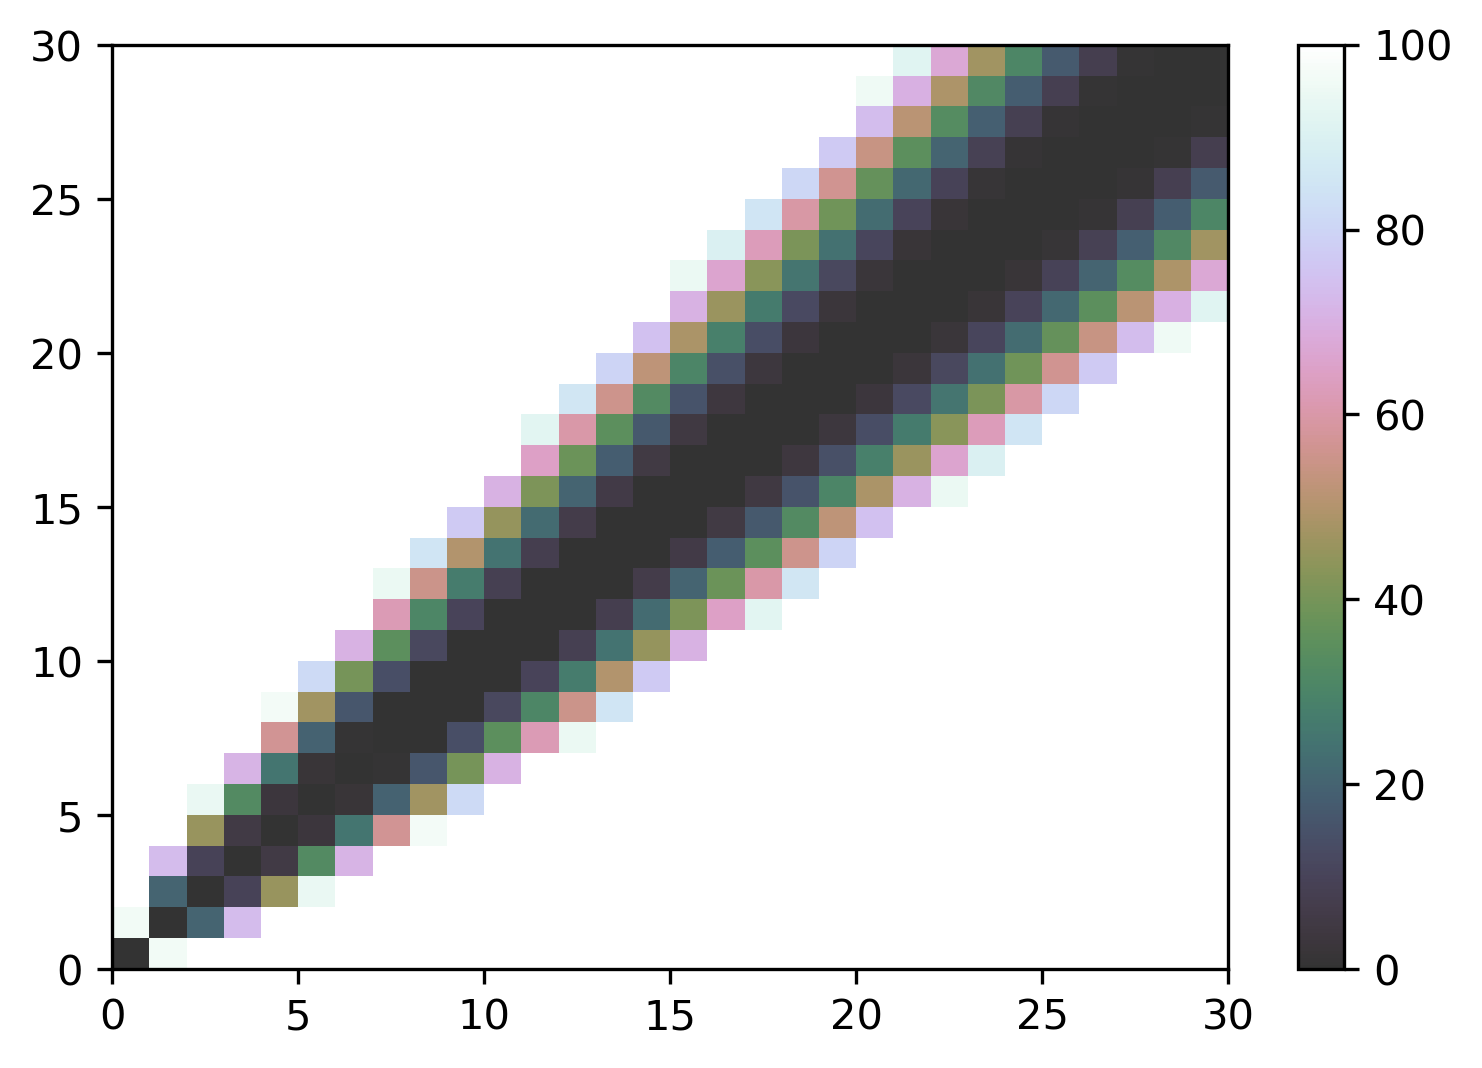

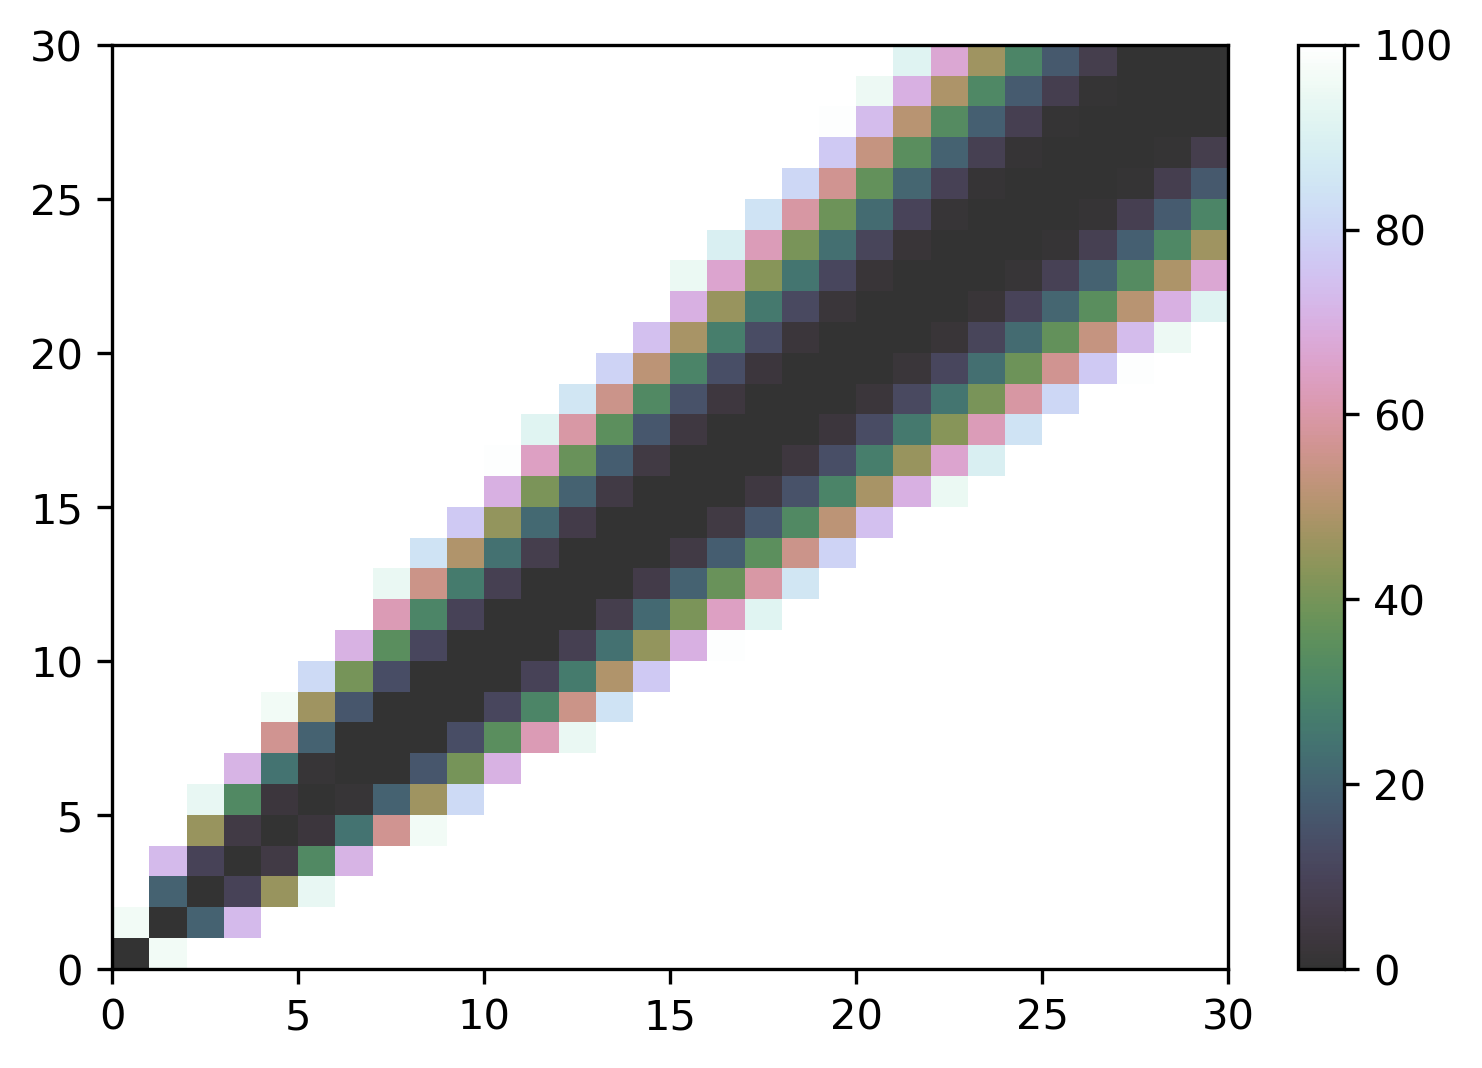

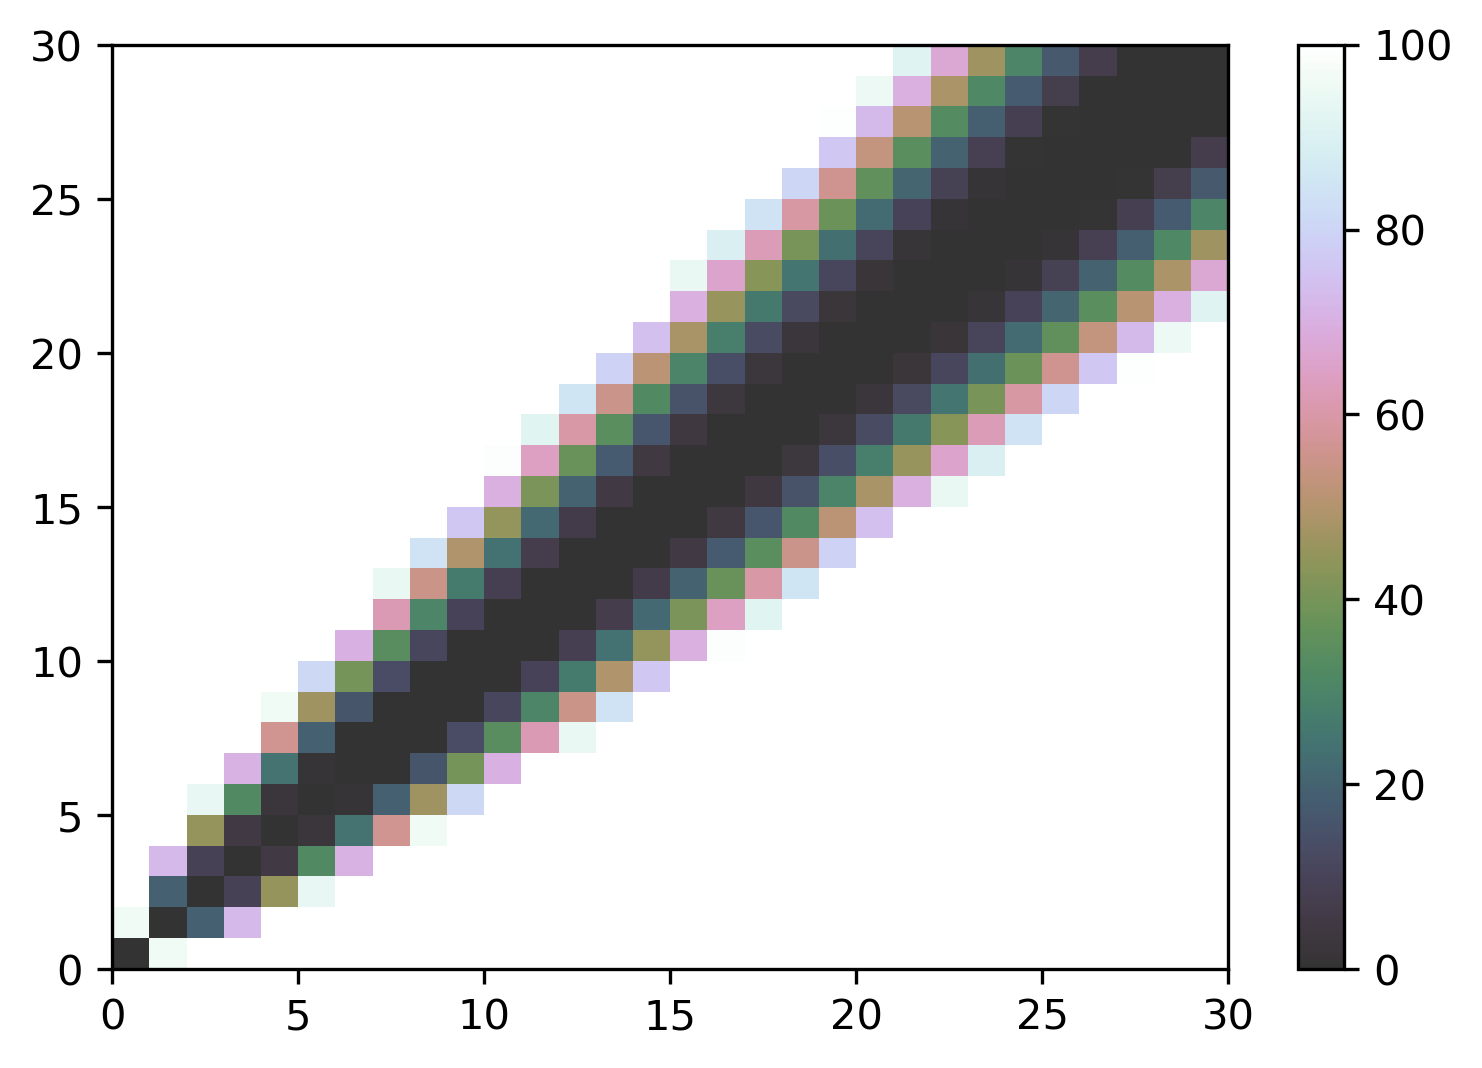

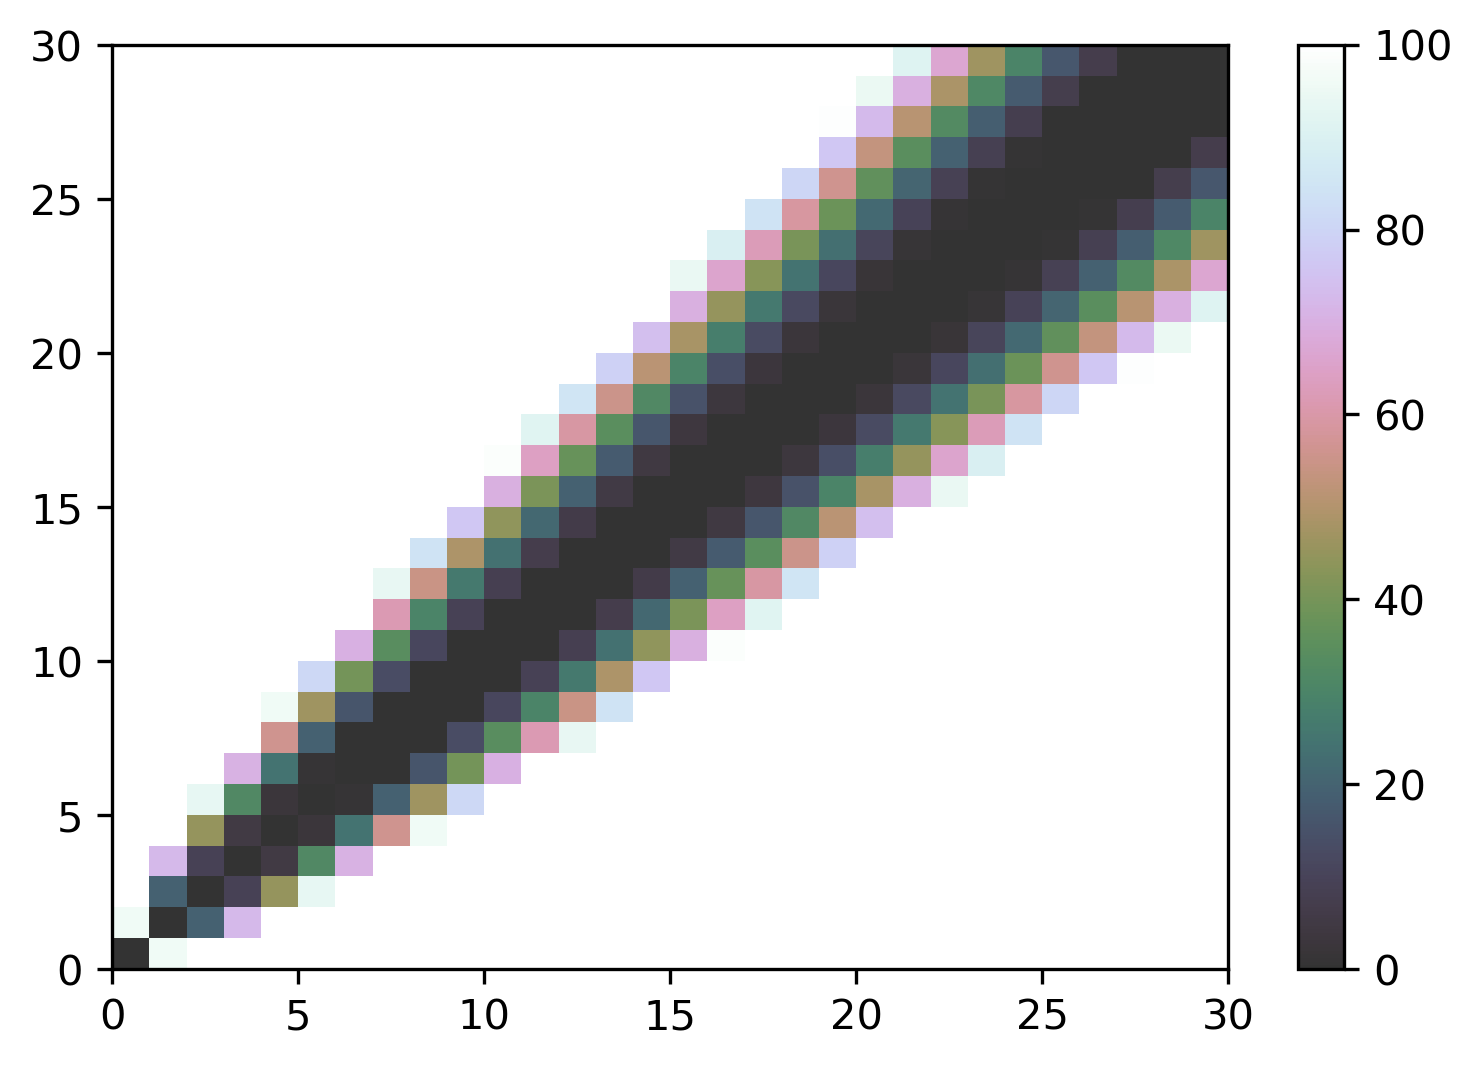

In [21]:
# varying N (more reps)


def heatmap(z):

    plt.figure(figsize=(6,4), dpi=300)
    plt.pcolormesh(z, cmap='cubehelix', alpha=0.8, norm=m.colors.Normalize(vmin=0, vmax=100))
    

    plt.colorbar()

    plt.show()


n_1 = np.linspace(0, 10000, 30, dtype=int)
n_2 = np.linspace(0, 10000, 30, dtype=int)

for reps in [3,6,9,12]:

    BFs = np.array([get_BF(8e+06 * reps, n_1, 8e+06 * reps, n_2) for n_1, n_2 in itertools.product(n_1, n_2)]).reshape((30, 30))

    heatmap(BFs)